# SIMPLE WORKFLOW FOR SPATIAL TRANSCRIPTOMICS ANALYSIS

## PARAMETERS

In [1]:
fileforloading = 'Spatialanalysis_SejongIn_Clinical_phenotype_LV_FullROI_N_cellselection_Y_Endothelial_cells_ROI_large_Vent_LV_DsSelect_ES_HCMP__NES_HCMP_Y_OL_pcaplot_outlier_RE_PID_Fixation.interval_KR_Y2023-06-23_analysis'

load(paste0(fileforloading, ".RData"))

Warning message:
“multiple methods tables found for ‘which’”


In [2]:
# ##################################################################
# 'TMA.block'
# 'ROI.size'
# 'Ventricle'
# 'Segment.id'
# 'Segment.type' -> "celltype"
# 'PID'
# 'Operation'
# 'Fixation.interval'
# 'Gender'
# 'Age'
# 'Institute'
# 'Clinical_phenotype_path'
# 'Clinical_endstage'
# 'After_LVAD'
# 'P_Normal'
# 'P_Degeneration''P_Hypertrophy''P_Disarray''P_Fibrosis''P_peri_infarction''P_etc'
# 'Echo_date''Echo_LVEF''Echo_LVPWd''Echo_IVSd''Echo_chamber_size''Echo_RWMA''Echo_RV_dysfunction''Echo_AR''Echo_MR''Echo_TR'
# 'ECG_date''ECG_voltage''ECG_QRS''VTandVF''AF''BNP''Probnp''CardiacMR_DE''Gene'
# 'ECG_voltage_n''ECG_QRS_n'
# 'Core.c.fullROI'
# 'PID.Op''PID.Op.bothblock''ROI.bothsize'
# 'Clinical_phenotype_LV''Clinical_phenotype_tri''Clinical_phenotype_bi'
# 'P_Deg_012', 'P_Hyp_012', 'P_Fib_012'

#Number of core to use for DREAM analysis
 NoCore = 8 # 8

# # Condition of interest (among column names of met)
  COI <- "Clinical_phenotype_LV"  # "P_Deg_012" # "Clinical_phenotype_LV" #, #"Clinical_phenotype_bi" #"Clinical_phenotype_tri" #, #"Clinical_phenotype_bi"   # COI <- "celltype" 
    # COI <- "celltype" 
# USING ONLY SPECIFIC SET of CORES - For example cores with full ROI 
  # FullROI_selection <- "Y"
  FullROI_selection <- "N"

# CELL TYPE SELECTION?
  # celltype_selection <- "N"  # or "N"
  celltype_selection <- "Y"  # or "N"

  # Which celltype? 
  cell_type<- "Endothelial_cells" # or ...'Endothelial_cells''Cardiomyocytes''No_segmentation''Fibroblasts'

# ROISIZE SELECTION?
 ROISIZE_selection <- "Y" # or "N"
 ROIsize <- "large" # or ...

# VENTRICLE SELECTION?
    # ventricle_selection <- "N"
    ventricle_selection <- "Y" # or "N"
    ventricle_type <- "LV"

# Clinical Disease selection with control samples

    disease_selection <- "Y"
    # disease_selection <- "N"

    disease_selection_var <- "Clinical_phenotype_LV"
    disease_type_vector <- c("ES_HCMP", "NES_HCMP")  ## Clinical_phenotype_LV - 'ES_HCMP''ICMP''Control''DCMP''NES_HCMP'
    disease_type <- if(disease_selection == "Y") {disease_type = disease_type_vector
                                                  }else{disease_type= "Non"
                                                       }

# OUTLIER SELECTION?
 # if no 
  grid_set = "Y" 
  # grid_set = "N"

 # choose which grid set to use from the PCAgrid()
if (grid_set == "N") {
    outlier_set = "N"
    } else {
    outlier_set = "pcaplot_outlier" # or pca_grid_10, pca_grid_3, etc
    }

RE1 = "PID"
RE2 = "Fixation.interval"
# RE3 = "Fixation.interval"
# RE4 = "P_Normal"
# RE4 = "Clinical_phenotype_LV"
# RE4 = "..." 
#...

if (exists("RE4")==TRUE) {
    (form <- formula(paste("~", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ") + (1|", RE4, ")", collapse="")))
    (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ") + (1|", RE4, ")", collapse="")))
# RE names
    (RE_names <- paste(RE1, RE2, RE3, RE4, sep="_"))
    }else{
    if (exists("RE3")==TRUE) {
        (form <- formula(paste("~", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ")", collapse="")))
        (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ")", collapse="")))

# RE names
        (RE_names <- paste(RE1, RE2, RE3, sep="_"))
        }else{
        if (exists("RE2")==TRUE) {
            (form <- formula(paste("~", "condition + (1|", RE1, ") + (1|", RE2, ")", collapse="")))
            (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ") + (1|", RE2, ")", collapse="")))

# RE names
            (RE_names <- paste(RE1, RE2, sep="_"))
            }else{
            if (exists("RE1")==TRUE) {
                (form <- formula(paste("~", "condition + (1|", RE1, ")", collapse="")))
                (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ")", collapse="")))

# RE names
                (RE_names <- paste(RE1, sep="_"))
                }else{
                (form <- formula(paste("~", "condition", collapse="")))
                (form_cont <- formula(paste("~ 0 +", "condition", collapse="")))

# RE names
                (RE_names <- paste(No, sep="_"))
                }
        }
    }
}
                
# Decide Contrast for DREAM

# makecontrastasroutine <- "celltype_comwith_othercells" 
# makecontrastasroutine <- "Forclinicaldisease" # or "Y" to make it according to the number of condition
makecontrastasroutine <- "Y" #to make it according to the number of condition
# makecontrastasroutine <- "Forclinicaldisease"
# Small sample number analysis 
 KRanaly <- "Y"
 # KRanaly <- "N"
# Order of batch correction
# Cell-type selection -> Batch correction

# Outlier 
# removed according to grid

# # ##################################################################
# met <- met %>% mutate(ClinicalNHist_Control = ifelse(Clinical_phenotype_bi == "Control", "Control_Clin", 
#                                                      ifelse(P_Normal == "1" & Clinical_phenotype_bi == "Diseased", "Control_His", "Diseased"))

[1] "PID_Fixation.interval"

In [3]:
(Analysis_name = paste("SejongIn_", COI, "_FullROI_", FullROI_selection, 
                      "_cellselection_", celltype_selection,
                                "_", cell_type, 
                                "_ROI_", ROIsize,
                                "_Vent_", ventricle_type,
                                "_DsSelect_", paste0(disease_type, "_", collapse="_"), disease_selection, 
                                "_", "OL_", outlier_set,
                                "_RE_", RE_names,
                                "_KR_", KRanaly,
                      Sys.Date(), sep=""))

[1] "SejongIn_Clinical_phenotype_LV_FullROI_N_cellselection_Y_Endothelial_cells_ROI_large_Vent_LV_DsSelect_ES_HCMP__NES_HCMP_Y_OL_pcaplot_outlier_RE_PID_Fixation.interval_KR_Y2023-06-23"

# PREPARATION

## Set up library

In [4]:
# R.Version()
# BiocManager::install(version = "3.14")
# BiocManager::install("sva")
# BiocManager::install("ggplot2")
# BiocManager::install("gridExtra")
# BiocManager::install("edgeR")
# BiocManager::install("UpSetR")
# BiocManager::install("tidyverse")
# BiocManager::install("BatchQC")
# BiocManager::install("RUVSeq")
# BiocManager::install("RColorBrewer")
# BiocManager::install("Glimma")
# BiocManager::install("variancePartition")
# BiocManager::install("BiocParallel")
# install.packages("gplots")
# install.packages("NMF")
# BiocManager::install("GO.db")
# BiocManager::install("org.Hs.eg.db")
# devtools::install_github("GabrielHoffman/variancePartition")
# remotes::install_github("valentint/rrcov")
# BiocManager::install("GSA")
# BiocManager::install("RCurl")
# BiocManager::install("RCy3")

In [2]:
library("sva")
library("ggplot2")
library("gridExtra")
library("edgeR")
library("UpSetR")
library("tidyverse")
library("BatchQC")
library("RColorBrewer")
library("Glimma")
library("variancePartition")
library("BiocParallel")
library("gplots")
library("NMF")
library("GO.db")
library("org.Hs.eg.db")
library(preprocessCore)
library(genefilter)
library(matrixStats)
library(rafalib)
library(PCAtools)
library(Biobase)
library(GEOquery)
library(bigutilsr)
library(spatstat)
library(matrixStats)
library(RCurl)
library(GSA)
library(RCy3)
library(fgsea)
library(data.table)
# library(plotly) # has conflict with org.Hs.eg.db select
# library(rrcov) # has conflict with biplot detach(rrcov)
# library(DT) 
# library(grid)
library(ComplexHeatmap)
# library(cluster)

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-42. For overview type 'help("mgcv-package")'.

Loading required package: genefilter

Loading required package: BiocParallel

Loading required package: limma

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.0
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse() masks nlme::collapse()
✖ dplyr::combine()  masks gridExtra::combine()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ readr::spec()     masks genefilter::spec()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required packag

In [6]:
options(repr.plot.width=20, repr.plot.height=10)


## FUNCTIONS

### Function to select groups according to phenotype

In [7]:
# if want to choose phenotpye dataset w, colname x , variable y, expressiondataset z)
# example 
# X="Segment.id"
# Y="Cardiomyocytes"
# W="p"
# Z="e_abc"

select_group <- function(x,y,w,z){
    df_p <- get(w)
    
assign(paste(w, y, sep="_"),df_p[df_p[[x]]==y,], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    # use [[]] instaed of $
    df_e <- get(z)
    df_p_new <- get(paste(w, y, sep="_"))

assign(paste(z, y, sep="_"), df_e[,colnames(df_e)%in%rownames(df_p_new)], envir = parent.frame())    
    df_e_new <- get(paste(z, y, sep="_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", w, "_", y, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_", y, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes"
# [1] "and the sample count in phenotype data is 91"
# [1] "the file name of the expression data is e_abc_Cardiomyocytes"
# [1] "and the sample count in expression data is 91"


### Function to remove group according to a phenotype

In [8]:
# if want to choose phenotpye dataset w, colname x , variable y, expressiondataset z)
# example 
# X="Institute"
# Y="Sejong"
# W="met"
# Z="exp_rmnp"

remove_group <- function(x,y,w,z){
    df_p <- get(w)
    
assign(paste(w, y, sep="_rm_"),df_p[df_p[[x]]!=y,], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    # use [[]] instaed of $
    df_e <- get(z)
    df_p_new <- get(paste(w, y, sep="_rm_"))

assign(paste(z, y, sep="_rm_"), df_e[,colnames(df_e)%in%rownames(df_p_new)], envir = parent.frame())    
    df_e_new <- get(paste(z, y, sep="_rm_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", w, "_rm_", y, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_rm_", y, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes"
# [1] "and the sample count in phenotype data is 91"
# [1] "the file name of the expression data is e_abc_Cardiomyocytes"
# [1] "and the sample count in expression data is 91"

### Function to select groups according to multiple phenotypes

In [9]:
# if want to choose phenotpye dataset w, colname x , vector of variables y, expressiondataset z)
# example ## select Control, HCMP only
# HCMPs <- c('Control','ES_HCMP', 'NES_HCMP') # Name of phenotypes to compare
# X="Clinical_phenotype_2nd"
# Y="HCMPs"
# W="p_Cardiomyocytes_rm_sp_gridflag_large_LV"
# Z="e_cmc_cb_rm_sp_gridflag_large_LV"

select_group_m <- function(x,y,w,z){
    df_p <- get(w)
    df_y <- get(y)
assign(paste(w, y, sep="_"),df_p[df_p[[x]]%in%df_y,], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    # use [[]] instaed of $
    df_e <- get(z)
    df_p_new <- get(paste(w, y, sep="_"))

assign(paste(z, y, sep="_"), df_e[,colnames(df_e)%in%rownames(df_p_new)], envir = parent.frame())    
    df_e_new <- get(paste(z, y, sep="_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", w, "_", y, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_", y, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes_rm_sp_gridflag_large_LV_HCMPs"
# [1] "and the sample count in phenotype data is 30"
# [1] "the file name of the expression data is e_cmc_cb_rm_sp_gridflag_large_LV_HCMPs"
# [1] "and the sample count in expression data is 30"


### Function to remove specific samples 

In [10]:
# if want to choose phenotpye dataset y, vector of samples to remove x, expressiondataset z)
# example vectors from pca_grid 
# sp_gridflag <-names(pca_grid_all$flag[pca_grid_all$flag==FALSE])
# X="sp_gridflag"
# Y="p_Cardiomyocytes"
# Z="e_cmc_cb_nl"
# df_p[!(rownames(df_p)%in%df_s),]
# df_e[,!(colnames(df_e)%in%df_s)]
remove_sample <- function(x,y,z){
    df_p <- get(y)
    df_e <- get(z)
    df_s <- get(x)
# new phenotype dataset    
assign(paste(y, x, sep="_rm_"), df_p[!(rownames(df_p)%in%df_s),], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    df_p_new <- get(paste(y, x, sep="_rm_"))

assign(paste(z, x, sep="_rm_"), df_e[,!(colnames(df_e)%in%df_s)], envir = parent.frame())    
    df_e_new <- get(paste(z, x, sep="_rm_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", y, "_rm_", x, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_rm_", x, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes_rm_sp_gridflag"
# [1] "and the sample count in phenotype data is 86"
# [1] "the file name of the expression data is e_cmc_cb_nl_rm_sp_gridflag"
# [1] "and the sample count in expression data is 86"

### Function to select specific samples

In [11]:
# if want to choose phenotpye dataset y, vector of samples to remove x, expressiondataset z)
# example vectors from pca_grid 
# sp_gridflag <-names(pca_grid_all$flag[pca_grid_all$flag==FALSE])
# X="sp_gridflag"
# Y="p_Cardiomyocytes"
# Z="e_cmc_cb_nl"
# df_p[!(rownames(df_p)%in%df_s),]
# df_e[,!(colnames(df_e)%in%df_s)]
select_sample <- function(x,y,z){
    df_p <- get(y)
    df_e <- get(z)
    df_s <- get(x)
# new phenotype dataset    
assign(paste(y, x, sep="_w_"), df_p[(rownames(df_p)%in%df_s),], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    df_p_new <- get(paste(y, x, sep="_w_"))

assign(paste(z, x, sep="_w_"), df_e[,(colnames(df_e)%in%df_s)], envir = parent.frame())    
    df_e_new <- get(paste(z, x, sep="_w_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", y, "_w_", x, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_w_", x, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes_rm_sp_gridflag"
# [1] "and the sample count in phenotype data is 86"
# [1] "the file name of the expression data is e_cmc_cb_nl_rm_sp_gridflag"
# [1] "and the sample count in expression data is 86"

### Function to compare two sample's correlation - 1 : qqplot_bc_nl(x,y)

In [12]:
### Function to compare two sample's correlation - 1 : qqplot_bc_nl(x,y)
## my first function
## making function par(mfrow=c(2,2))
qqplot_bc_nl <- function(x, y) {
    print(paste("Comparing", x, " and ", y, "with qqplot"))
    par(mfrow=c(2,4))

# exp_out : before batch correction
qqplot(log2(exp_out[,x]+1), log2(exp_out[,y]+1), main="before batch corr and normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(exp_out[,x], exp_out[,y], main="before batch corr and normalization")
abline(c(0,1), col=1, lwd=3)

# normalization before batch correction
# e_bb_norm = normalize.quantiles(as.matrix(exp_out))
# colnames(e_bb_norm) <- colnames(exp_out)
# rownames(e_bb_norm) <- rownames(exp_out)
    
qqplot(log2(e_bb_norm[,x]+1), log2(e_bb_norm[,y]+1), main="before batch corr after normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(e_bb_norm[,x], e_bb_norm[,y], main="before batch corr after normalization")
abline(c(0,1), col=1, lwd=3)

# after batch correction

qqplot(log2(e[,x]+1), log2(e[,y]+1), main="after batch corr before normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(e[,x], e[,y], main="after batch corr before normalization")
abline(c(0,1), col=1, lwd=3)

# after normalization
# e_norm = normalize.quantiles(as.matrix(e))
# colnames(e_norm) <- colnames(e)
# rownames(e_norm) <- rownames(e)

qqplot(log2(e_norm[,x]+1), log2(e_norm[,y]+1), main="after batch corr after normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(e_norm[,x], e_norm[,y], main="after batch corr after normalization")
abline(c(0,1), col=1, lwd=3)

}

### Function to compare two sample's correlation - 2 : maplot_bc_nl(x,y)

In [13]:
### Function to compare two sample's correlation - 2 : maplot_bc_nl(x,y)
# ## making second function
# plot(x,y,xlab="Father's height in inches",ylab="Son's height in inches",main=paste("correlation =",signif(cor(x,y),2)))

maplot_bc_nl <- function(x, y) {
    print(paste("Comparing", x, " and ", y, "with maplot"))
    par(mfrow=c(2,4))
    
# before batch correction

mm2 = log2(exp_out[,x]+1) - log2(exp_out[,y]+1)
aa2 = log2(exp_out[,x]+1) + log2(exp_out[,y]+1)
plot(aa2,mm2,col=2, main=paste("standard deviation", round(sd(mm2),2), "before batch corr before normalization, log2"))
abline(c(0,0), col=2, lwd=3)
    
mm = exp_out[,x] - exp_out[,y]
aa = (exp_out[,1]+exp_out[,2])/2
plot(aa,mm,col=2, main=paste("standard deviation", round(sd(mm),2), "before batch corr before normalization"))
abline(c(0,0), col=2, lwd=3)


# normalization before batch correction
mm2_normal = log2(e_bb_norm[,x]+1) - log2(e_bb_norm[,y]+1)
aa2_normal = log2(e_bb_norm[,x]+1) + log2(e_bb_norm[,y]+1)
plot(aa2_normal,mm2_normal,col=2, main=paste("standard deviation", round(sd(mm2_normal),2), "before batch corr after normalization, log2"))
abline(c(0,0), col=1, lwd=3)
  
    
mm_normal = e_bb_norm[,x] - e_bb_norm[,y]
aa_normal = (e_bb_norm[,x] + e_bb_norm[,y])/2
plot(aa_normal,mm_normal,col=2, main=paste("standard deviation", round(sd(mm_normal),2), "before batch corr after normalization"))
abline(c(0,0), col=2, lwd=3)
    

# after batch correction
    
mm1 = log2(e[,x]+1) - log2(e[,y]+1)
aa1 = log2(e[,x]+1) + log2(e[,y]+1)
plot(aa1,mm1,col=2 , main=paste("standard deviation", round(sd(mm1),2), "after batch corr before normalization, log2"))
abline(c(0,0), col=2, lwd=3)
    
mm_bc = e[,x] - e[,y]
aa_bc = (e[,x] + e[,y])/2
plot(aa_bc,mm_bc,col=2, main=paste("standard deviation", round(sd(mm_bc),2), "after batch corr before normalization"))
abline(c(0,0), col=2, lwd=3)
    
# normalization after batch correction
mm1_normal = log2(e_norm[,x]+1) - log2(e_norm[,y]+1)
aa1_normal = log2(e_norm[,x]+1) + log2(e_norm[,y]+1)
plot(aa1_normal,mm1_normal,col=2, main=paste("standard deviation", round(sd(mm1_normal),2), "after batch corr after normalization, log2"))
abline(c(0,0), col=1, lwd=3)
    
mm_bcnormal = e_norm[,x] - e_norm[,y]
aa_bcnormal = (e_norm[,x] + e_norm[,y])/2
plot(aa_bcnormal,mm_bcnormal,col=2, main=paste("standard deviation", round(sd(mm_bcnormal),2), "after batch corr after normalization"))
abline(c(0,0), col=2, lwd=3)

}

### Function to compare two sample's correlation - 3 : plot_bc_nl(x,y)

In [14]:
### Function to compare two sample's correlation - 3 : plot_bc_nl(x,y)
## making function par(mfrow=c(2,2))
# plot(x,y,xlab="Father's height in inches",ylab="Son's height in inches",main=paste("correlation =",signif(cor(x,y),2)))

plot_bc_nl <- function(x, y) {
    print(paste("Comparing", x, " and ", y, "with simple plot"))
    par(mfrow=c(2,4))

# exp_out : before batch correction
plot(log2(exp_out[,x]+1), log2(exp_out[,y]+1), main=paste("correlation=", signif(cor(log2(exp_out[,x]+1), log2(exp_out[,y]+1)),2),"before batch corr and normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(exp_out[,x], exp_out[,y], main=paste("correlation=", signif(cor(exp_out[,x], exp_out[,y]),2),"before batch corr and normalization"))
abline(c(0,1), col=1, lwd=3)

# normalization before batch correction
# e_bb_norm = normalize.quantiles(as.matrix(exp_out))
# colnames(e_bb_norm) <- colnames(exp_out)
# rownames(e_bb_norm) <- rownames(exp_out)
    
plot(log2(e_bb_norm[,x]+1), log2(e_bb_norm[,y]+1), main=paste("correlation=", signif(cor(log2(e_bb_norm[,x]+1), log2(e_bb_norm[,y]+1)),2),"before batch corr after normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(e_bb_norm[,x], e_bb_norm[,y], main=paste("correlation=", signif(cor(e_bb_norm[,x], e_bb_norm[,y]),2),"before batch corr after normalization"))
abline(c(0,1), col=1, lwd=3)

# after batch correction

plot(log2(e[,x]+1), log2(e[,y]+1), main=paste("correlation=", signif(cor(log2(e[,x]+1), log2(e[,y]+1)),2),"after batch corr before normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(e[,x], e[,y], main=paste("correlation=", signif(cor(e[,x], e[,y]),2),"after batch corr before normalization"))
abline(c(0,1), col=1, lwd=3)

# after normalization
# e_norm = normalize.quantiles(as.matrix(e))
# colnames(e_norm) <- colnames(e)
# rownames(e_norm) <- rownames(e)

plot(log2(e_norm[,x]+1), log2(e_norm[,y]+1), main=paste("correlation=", signif(cor(log2(e_norm[,x]+1), log2(e_norm[,y]+1)),2),"after batch corr after normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(e_norm[,x], e_norm[,y], main=paste("correlation=", signif(cor(e_norm[,x], e_norm[,y]),2),"after batch corr after normalization"))
abline(c(0,1), col=1, lwd=3)

}

### Function to compare two sample's correlation - 4 : summary_lm(x,y)

In [15]:
### Function to compare two sample's correlation - 4 : summary_lm(x,y)
## making function par(mfrow=c(2,2))
summary_lm <- function(x, y) {
print(paste("Comparing", x, " and ", y, "with linear regression"))

    a<-lm(log2(exp_out[,x]+1) ~ log2(exp_out[,y]+1))
    b<-lm(exp_out[,x] ~ exp_out[,y])
    
    c <- lm(log2(e_bb_norm[,x]+1) ~ log2(e_bb_norm[,y]+1))
    d <- lm(e_bb_norm[,x] ~ e_bb_norm[,y])

# after batch correction

    f <- lm(log2(e[,x]+1) ~ log2(e[,y]+1))
    g <- lm(e[,x] ~ e[,y])

# after normalization
    h <- lm(log2(e_norm[,x]+1) ~ log2(e_norm[,y]+1))
    i <- lm(e_norm[,x] ~ e_norm[,y])

    

    print("before batch correction before normalization")
    print(a$coefficients[2])
    print(b$coefficients[2])

    print("before batch correction after normalization")
    
    print(c$coefficients[2])
    print(d$coefficients[2])
    
    print("after batch correction before normalization")
    
    print(f$coefficients[2])
    print(g$coefficients[2])
    
    print("after batch correction after normalization")
    
    print(h$coefficients[2])
    print(i$coefficients[2])

}

### Function to compare two sample's distance - 5 : distance_eucl

In [16]:
# # calculate all euclidean distance first - for time saving once 
#     d_exp_out <- dist(t(exp_out))
#     d_e_bb_norm <- dist(t(e_bb_norm))
#     d_e <- dist(t(e))
#     d_e_norm <- dist(t(e_norm))

In [17]:
### Function to compare two sample's distance - 5 : distance_eucl(x,y)
## making function par(mfrow=c(2,2))
distance_eucl <- function(x, y) {
print(paste("Comparing", x, " and ", y, "with euclidean distance"))
# calculate all euclidean distance first - for time saving once 
    # d_exp_out <- dist(t(exp_out))
    # d_e_bb_norm <- dist(t(e_bb_norm))
    # d_e <- dist(t(e))
    # d_e_norm <- dist(t(e_norm))
    
    a<-as.matrix(d_exp_out)[x,y]
    b<-as.matrix(d_e_bb_norm)[x,y]
    c<-as.matrix(d_e)[x,y]
    d<-as.matrix(d_e_norm)[x,y]

    print("distance before batch correction before normalization")
    print(a)
    print("distance before batch correction after normalization")
    print(b)
    print("distance after batch correction before normalization")
    print(c)
    print("distance after batch correction after normalization")
    print(d)
    
}

# INPUT DATA

##  Input data - new 

In [18]:
# Decide Input file
Input_expr_data = "Probe_QC_1percfilter.csv"
Input_pheno_data = "Spatial_Annotation.csv"

# Read Input files
exp_qc <- read.csv(Input_expr_data, row.names = 1, header = TRUE, stringsAsFactors=FALSE)
met_tmp<- read.csv(Input_pheno_data, header=TRUE, stringsAsFactors=FALSE)

# Modify Input data
met_tmp <- met_tmp %>% mutate(Name=paste(Scan.name, formatC(ROI..label., width=3, flag="0"), Segment..Name..Label., sep="..."))
rownames(met_tmp)<- gsub(' ', '.', met_tmp$Name)

met<-met_tmp[match(colnames(exp_qc), rownames(met_tmp)),]
identical(colnames(exp_qc), rownames(met))

met <- met %>% mutate(TMA.block = factor(TMA.block))

[1] TRUE

In [19]:
celltype <- as.factor(met$Segment..Name..Label.)
celltype <- gsub("Full ROI", "No_Seg",celltype) 
celltype <- gsub("Trp", "CMC", celltype)
celltype <- gsub("vessel", "EC", celltype)
celltype <- gsub("fb", "FB", celltype)

In [20]:
met <- cbind(met, celltype)

## Remove negative probe

In [21]:
negprobe=which(rownames(exp_qc)%in%"NegProbe-WTX")

class(negprobe)

exp_rmnp <- exp_qc[-negprobe,]
dim(exp_rmnp)
dim(exp_qc)

[1] "integer"

[1] 12800   178

[1] 12801   178

## GENE ANNOTATION (GENEID)

In [22]:
if ("plotly" %in% tolower((.packages())) == TRUE) {
    detach("package:plotly", unload=TRUE)
    }

In [23]:
symbols <- rownames(exp_rmnp)

In [24]:
fdata <- select(org.Hs.eg.db, symbols, c("ENTREZID", "GENENAME"), "SYMBOL")

'select()' returned 1:many mapping between keys and columns



In [25]:
identical(fdata$SYMBOL,symbols)

[1] FALSE

In [26]:
## There are duplicates and missing

In [27]:
## first remove duplicates

In [28]:
## MENO1 take 51072 according to nanostring excel information

In [29]:
which(fdata$SYMBOL=="MEMO1")

[1] 17 18

In [30]:
fdata_nodup <- fdata[-17,]

In [31]:
dim(fdata_nodup)

[1] 12800     3

In [32]:
which(fdata_nodup$SYMBOL=="MEMO1")

[1] 17

In [33]:
## Replace Missing ENTREZIDs with IDs in Geomx file

In [34]:
symbols_noID<-fdata_nodup$SYMBOL[which(is.na(fdata_nodup$ENTREZID))]
length(symbols_noID)

[1] 62

In [35]:
gene_list = "gene_list.csv"
geomx_gene <-read.csv(gene_list, header=TRUE, stringsAsFactors=FALSE)

In [36]:
geomx_glist<-geomx_gene[,c("TargetName","GeneID")]

In [37]:
missing_geomx <- geomx_glist$TargetName[which(geomx_glist$TargetName%in%symbols_noID)]
length(which(geomx_glist$TargetName%in%symbols_noID))

[1] 62

In [38]:
missing_glist<-geomx_glist[which(geomx_glist$TargetName%in%symbols_noID),]

In [39]:
reorder_missing_glist<-missing_glist[match(symbols_noID,missing_geomx),]
identical(reorder_missing_glist$TargetName, symbols_noID)

# fdata_nodup$ENTREZID[which(is.na(fdata_nodup$ENTREZID))]<-missing_geomx_tb$GeneID

[1] TRUE

In [40]:
fdata_nodup$ENTREZID[which(is.na(fdata_nodup$ENTREZID))] <- reorder_missing_glist$GeneID

### check duplicated IDs

In [41]:
test_dupl<-fdata_nodup[order(fdata_nodup$ENTREZID),]
head(test_dupl)

,SYMBOL,ENTREZID,GENENAME
,<chr>,<chr>,<chr>
4255,NAT2,10,N-acetyltransferase 2
4460,ADA,100,adenosine deaminase
8004,CDH2,1000,cadherin 2
2680,AKT3,10000,AKT serine/threonine kinase 3
7322,MED6,10001,mediator complex subunit 6
7544,ACOT8,10005,acyl-CoA thioesterase 8


In [42]:
which(duplicated(test_dupl$ENTREZID)==TRUE)

integer(0)

In [43]:
duplicated_fdata<-test_dupl[duplicated(test_dupl$ENTREZID)|duplicated(test_dupl$ENTREZID, fromLast=TRUE),]

In [44]:
duplicated_fdata

SYMBOL,ENTREZID,GENENAME
<chr>,<chr>,<chr>


In [45]:
## confirmed that there is no duplicates

### If wants to change rownames to ENTREZID

In [46]:
# rownames(e_abc)<-fdata_nodup$ENTREZID

## Three data sets

In [47]:
Input_for_bc = exp_rmnp

In [48]:
# e_abc <- exp_cb # after batch correction for block considering cell types
e_bbc <- Input_for_bc # before batch correction 
# e_abc_nl <- normalize.quantiles(as.matrix(e_abc)) # normalization after batch correction for block considering cell types
e_bbc_nl <- normalize.quantiles(as.matrix(Input_for_bc)) # before batch correction but normalized 

# colnames(e_abc_nl) <- colnames(e_abc)
# rownames(e_abc_nl) <- rownames(e_abc)

colnames(e_bbc_nl) <- colnames(Input_for_bc)
rownames(e_bbc_nl) <- rownames(Input_for_bc)

f <- fdata_nodup
p <- met

In [49]:
unique(p$Segment.id)

[1] "Endothelial_cells"     "Cardiomyocytes"        "No_segmentation"      
[4] "Fibroblasts"           "Cardiomyocytes_low"    "Endothelial_cells_low"

# GROUP SELECTION & BATCH CORRECTION

## Select Full-ROI set

In [50]:
 X0="Core.c.fullROI"
 Y0="Yes"
 W0="p"
 Z0="e_bbc" 
if (FullROI_selection == "Y") {

select_group(X0,Y0,W0,Z0)

output_p0 = get(paste(W0, "_", Y0, sep=""))
output_e0 = get(paste(Z0, "_", Y0, sep=""))
    } else {
    output_p0 = get(W0)
    output_e0 = get(Z0)
    }

## Select Cell-type 

In [51]:
 X1="Segment.id"
 Y1= cell_type
 W1="output_p0"
 Z1="output_e0"

if (celltype_selection == "Y") {

select_group(X1,Y1,W1,Z1)

output_p1 = get(paste(W1, "_", Y1, sep=""))
output_e1 = get(paste(Z1, "_", Y1, sep=""))
    } else {
    output_p1 = get(W1)
    output_e1 = get(Z1)
    }

[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p0_Endothelial_cells"
[1] "and the sample count in phenotype data is 48"
[1] "the file name of the expression data is output_e0_Endothelial_cells"
[1] "and the sample count in expression data is 48"


## Batch Correction (TMA.block)

In [52]:
# select COI
condition = output_p1[[COI]]

In [53]:
# Input data
Input_for_bc_2 = output_e1
#perform the batch correction
batch = output_p1$TMA.block
##** need to correct condition according to the phenotype interesting
# condition = p_Cardiomyocytes$P_Normal

#groups = sapply(as.character(condition), switch, "Full ROI" = 1, "Trp" = 2, "vessel" = 3, "fb" = 4, USE.NAMES = F)
batches = sapply(as.character(batch), switch, "1" = 1, "2" = 2, USE.NAMES = F)
output_bc = ComBat_seq(counts = as.matrix(Input_for_bc_2), batch = batches, group = condition)

Found 2 batches
Using full model in ComBat-seq.
Adjusting for 4 covariate(s) or covariate level(s)
Estimating dispersions
Fitting the GLM model
Shrinkage off - using GLM estimates for parameters
Adjusting the data


## Select Large and LV only ROI.size=='large'

In [54]:
    X2="ROI.size"
    Y2= ROIsize
    W2="output_p1"
    Z2="output_bc"
## select Large and LV only ROI.size=='large'
if (ROISIZE_selection == "Y") {
    
    select_group(X2,Y2,W2,Z2)
    
    output_p2 = get(paste(W2, "_", Y2, sep=""))
    output_e2 = get(paste(Z2, "_", Y2, sep=""))
} else {
    output_p2 = get(W2)
    output_e2 = get(Z2)
}


[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p1_large"
[1] "and the sample count in phenotype data is 48"
[1] "the file name of the expression data is output_bc_large"
[1] "and the sample count in expression data is 48"


## Select Large and LV only Ventricle=='LV'

In [55]:
    X3="Ventricle"
    Y3=ventricle_type
    W3="output_p2"
    Z3="output_e2"
# input = output of above cell

if (ventricle_selection == "Y") {
    select_group(X3,Y3,W3,Z3)
    
    output_p5 = get(paste(W3, "_", Y3, sep=""))
    output_e5 = get(paste(Z3, "_", Y3, sep=""))
    } else {
    output_p5 = get(W3)
    output_e5 = get(Z3)
    }


[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p2_LV"
[1] "and the sample count in phenotype data is 43"
[1] "the file name of the expression data is output_e2_LV"
[1] "and the sample count in expression data is 43"


## Select Specific Disease and Control samples

In [56]:
X5=disease_selection_var
Y5="disease_type"
W5="output_p5"
Z5="output_e5"

if (disease_selection == "Y") {
    select_group_m(X5,Y5,W5,Z5)
    
    output_p3 = get(paste(W5, "_", Y5, sep=""))
    output_e3 = get(paste(Z5, "_", Y5, sep=""))
    } else {
    output_p3 = get(W5)
    output_e3 = get(Z5)
    }

[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p5_disease_type"
[1] "and the sample count in phenotype data is 20"
[1] "the file name of the expression data is output_e5_disease_type"
[1] "and the sample count in expression data is 20"


# Intermediate DATA INPUT

In [57]:
d_1 <- DGEList(output_e3)

In [58]:
d_1q3 <- calcNormFactors(d_1, method="upperquartile")
# d_1tmm <- calcNormFactors(d_1)

# PCA ANALYSIS

In [59]:
options(repr.plot.width=20, repr.plot.height=10)


In [60]:
if ("rrcov" %in% tolower((.packages())) == TRUE) {
    detach("package:rrcov", unload=TRUE)
    }


In [61]:
d_1q3cpm<-cpm(d_1q3, log=FALSE)
# # cpm 
# output_e3_nl_cpm <- cpm(output_e3_nl, log=FALSE)
# # output_e3_bc_nl_cpm <- cpm(output_e3_bc_nl, log=FALSE)                                 

In [62]:
e.list <- list(d_1q3cpm)

In [63]:

pca.list <- lapply(e.list, function(x) pca(x, metadata=output_p3, removeVar = 0.1, scale = TRUE))

-- removing the lower 10% of variables based on variance



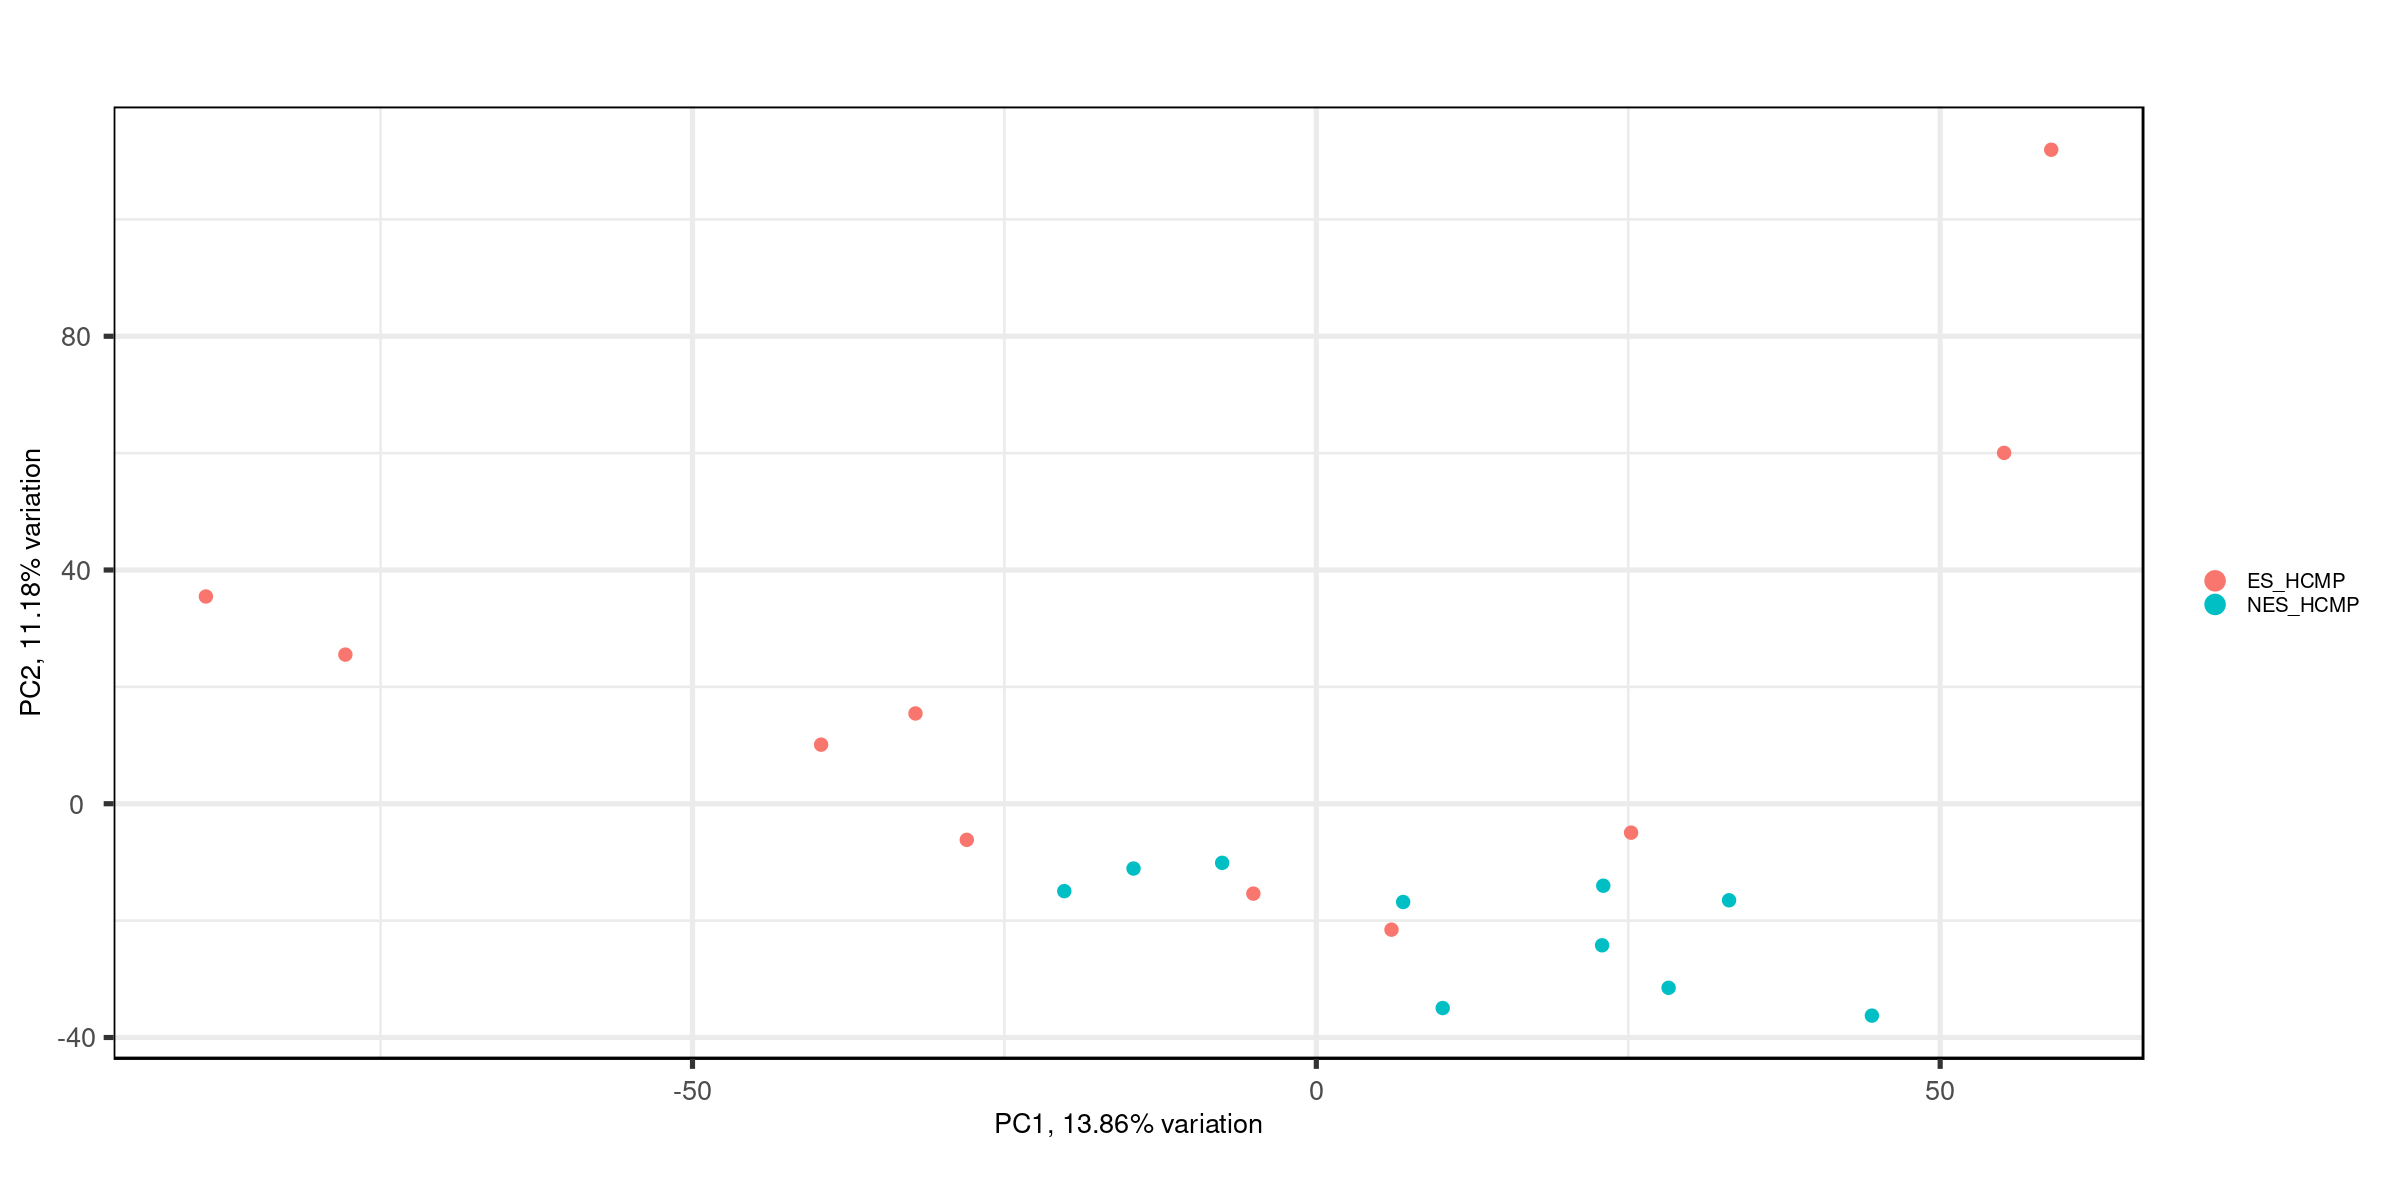

In [64]:
## PCA for COI

par(mfrow=c(2,2))
for(i in 1:length(e.list)){
    fig <- biplot(pca.list[[i]], lab="", 
           colby =COI,
           legendPosition = "right",
                 # title=pca_title[i]
                  #,shape="TMA.block"
                 )
    print(fig)
    
}

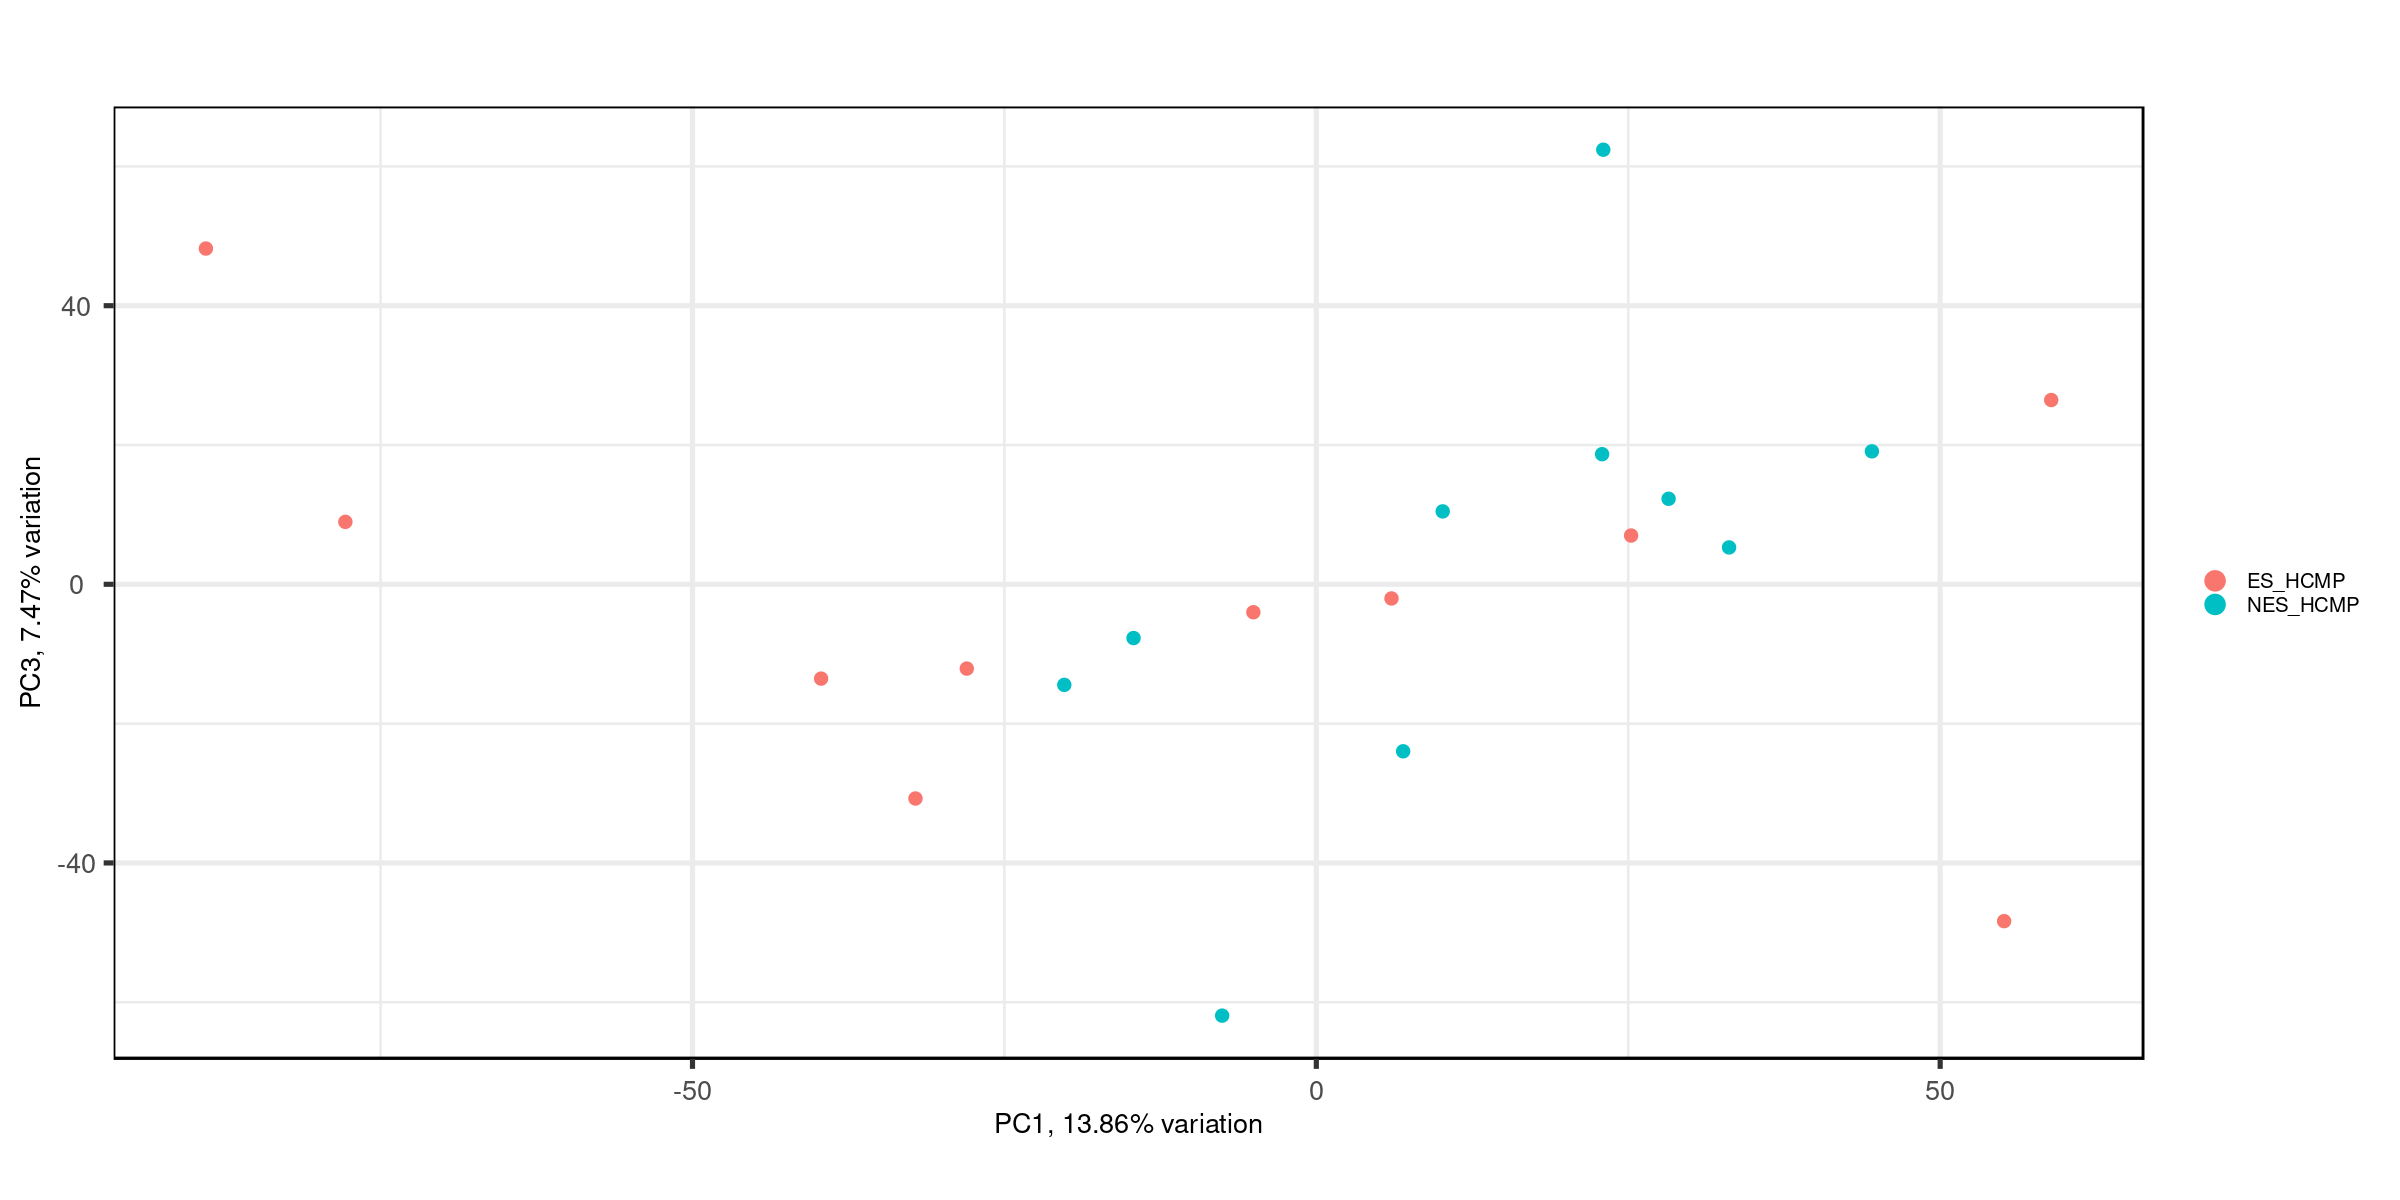

In [65]:
## PCA for COI

par(mfrow=c(2,2))
for(i in 1:length(e.list)){
    fig <- biplot(pca.list[[i]], lab="", 
                  x = "PC1", y = "PC3",
           colby =COI,
           legendPosition = "right",
                 # title=pca_title[i]
                  #,shape="TMA.block"
                 )
    print(fig)
    
}

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replac

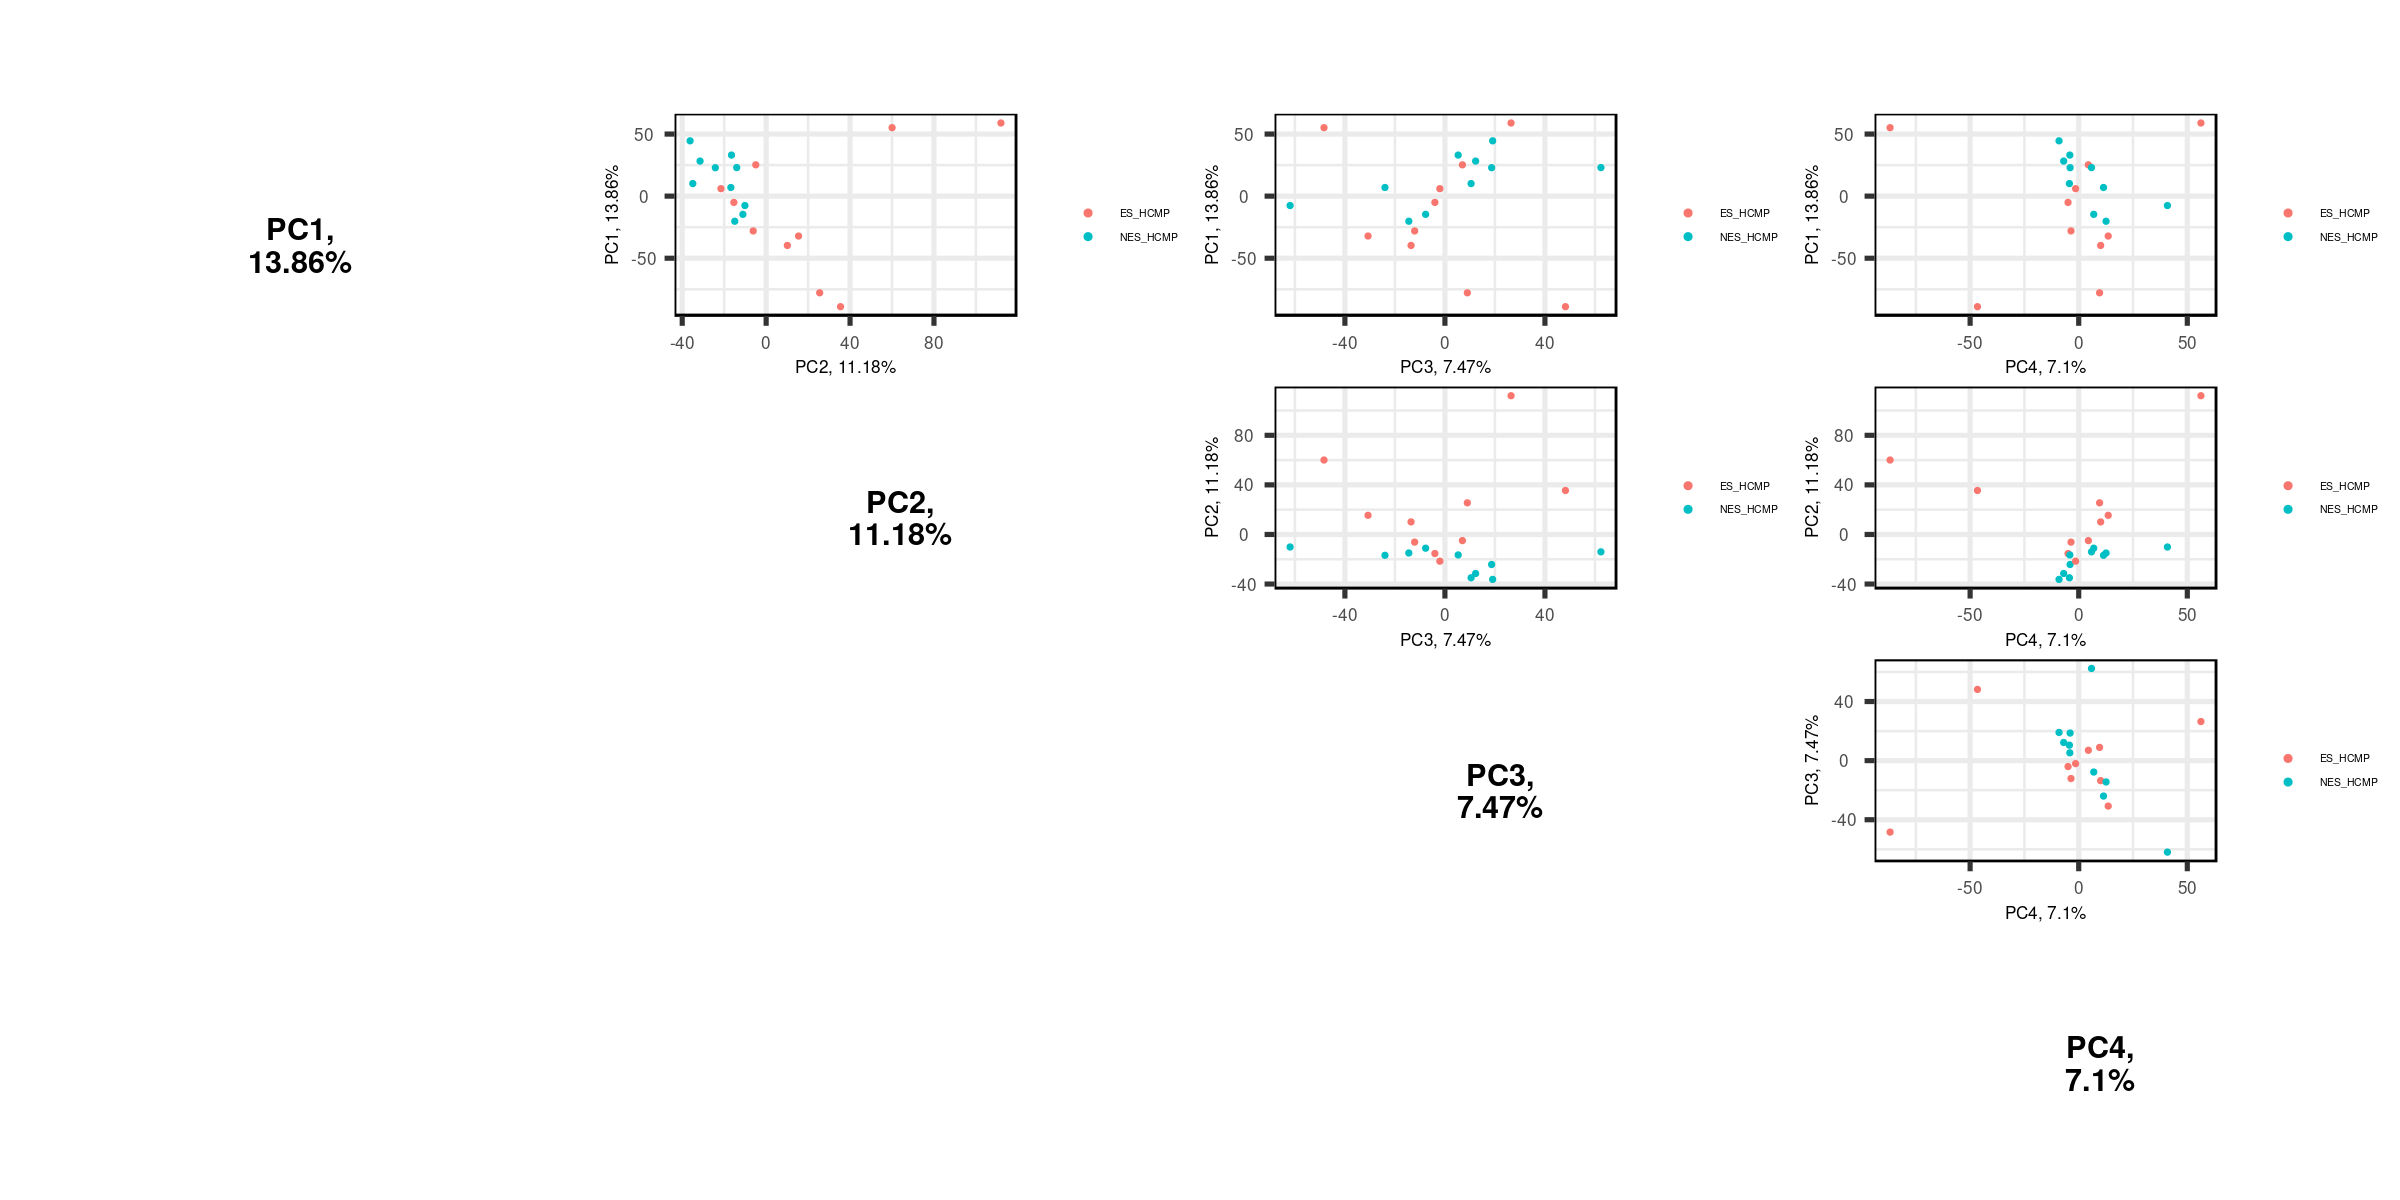

In [66]:
## PCA for COI
par(mfrow=c(2,2))
for(i in 1:length(e.list)){
    fig <- pairsplot(pca.list[[i]] 
           , components = getComponents(pca.list[[i]] , seq_len(4))
           , lab="", 
           colby =COI,
           legendPosition = "right",
                 # title=pca_title[i]
                  #,shape="TMA.block"
                 )
    print(fig)
    
}

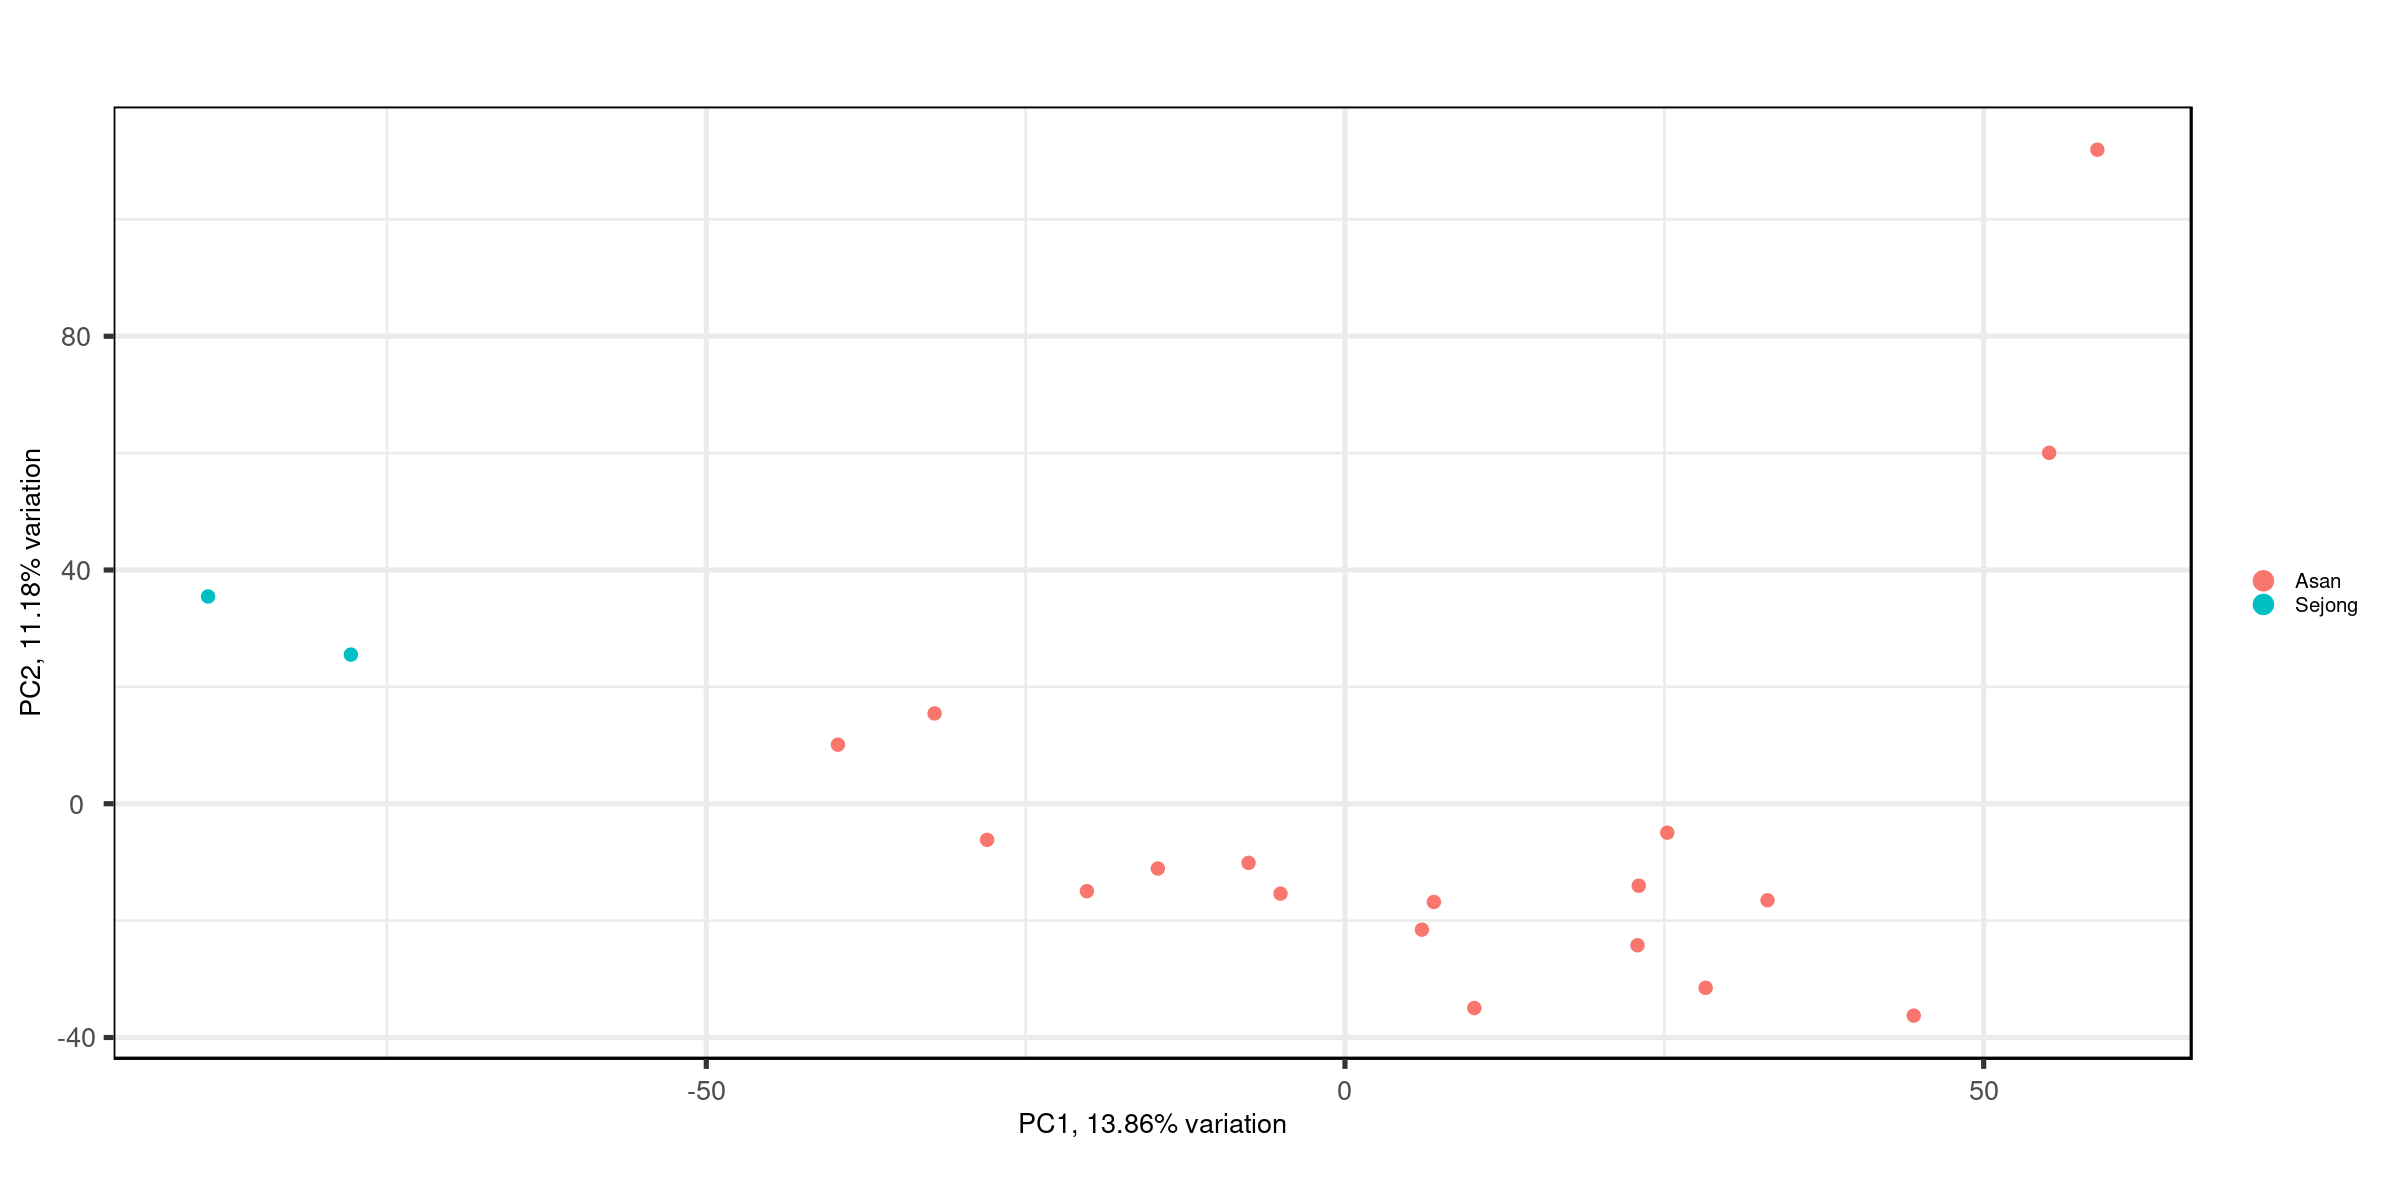

In [67]:
## PCA for Institute

for(i in 1:length(e.list)){
    fig <- biplot(pca.list[[i]], lab="",
           colby = "Institute",
           legendPosition = "right",
                 # title=pca_title[i]
                 )
    print(fig)
}

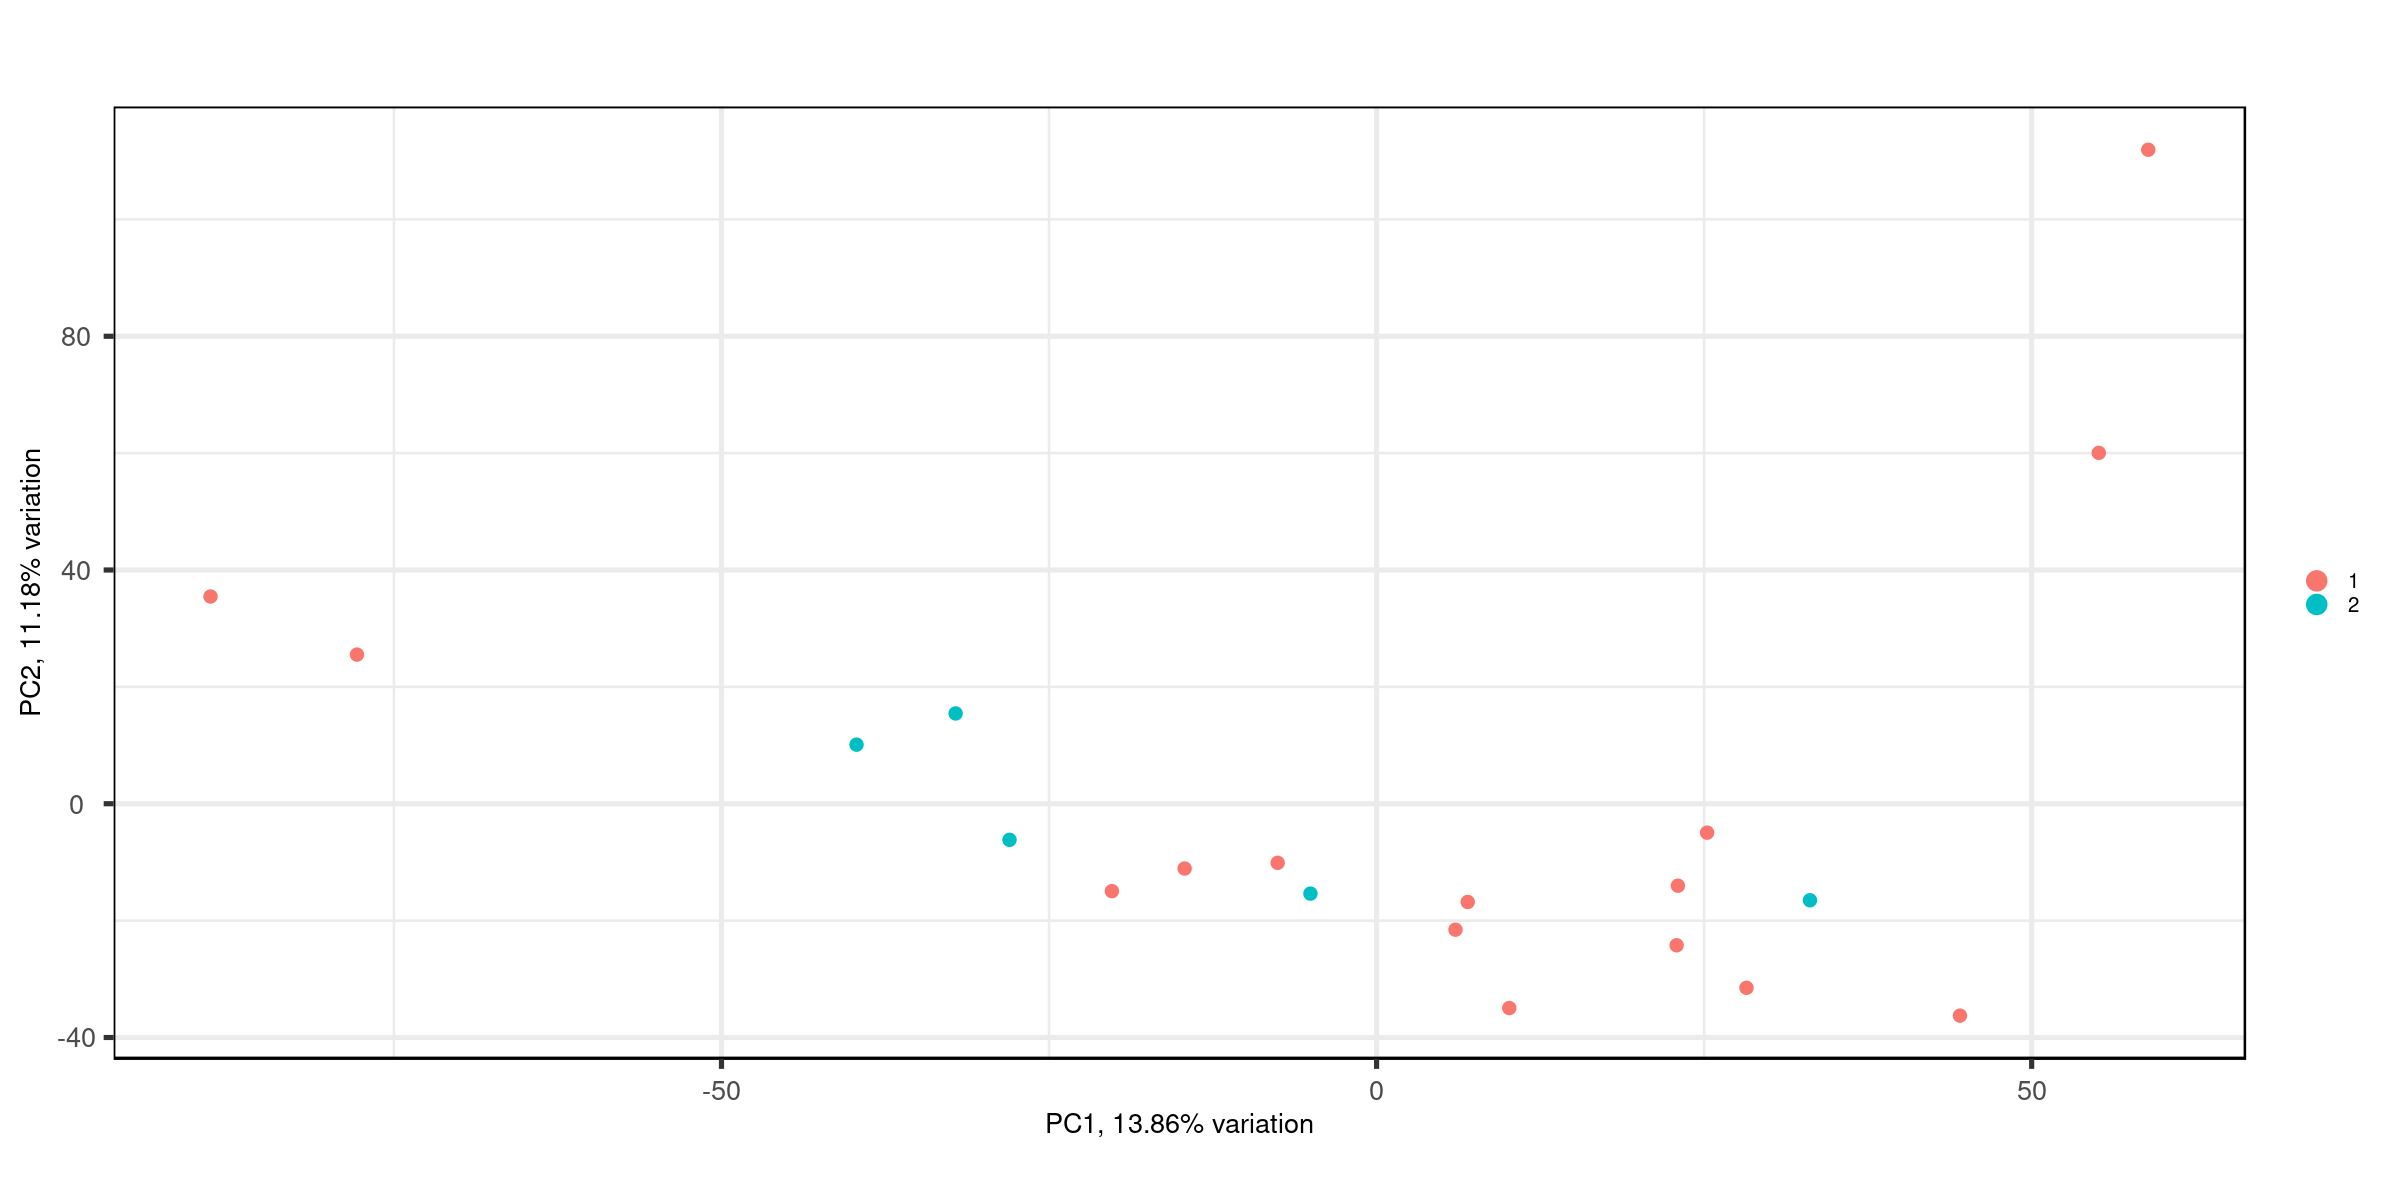

In [68]:
## PCA for blocks

for(i in 1:length(e.list)){
    fig <- biplot(pca.list[[i]], lab="",
           colby = "TMA.block",
           legendPosition = "right",
                 # title=pca_title[i]
                 )
    print(fig)
}

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


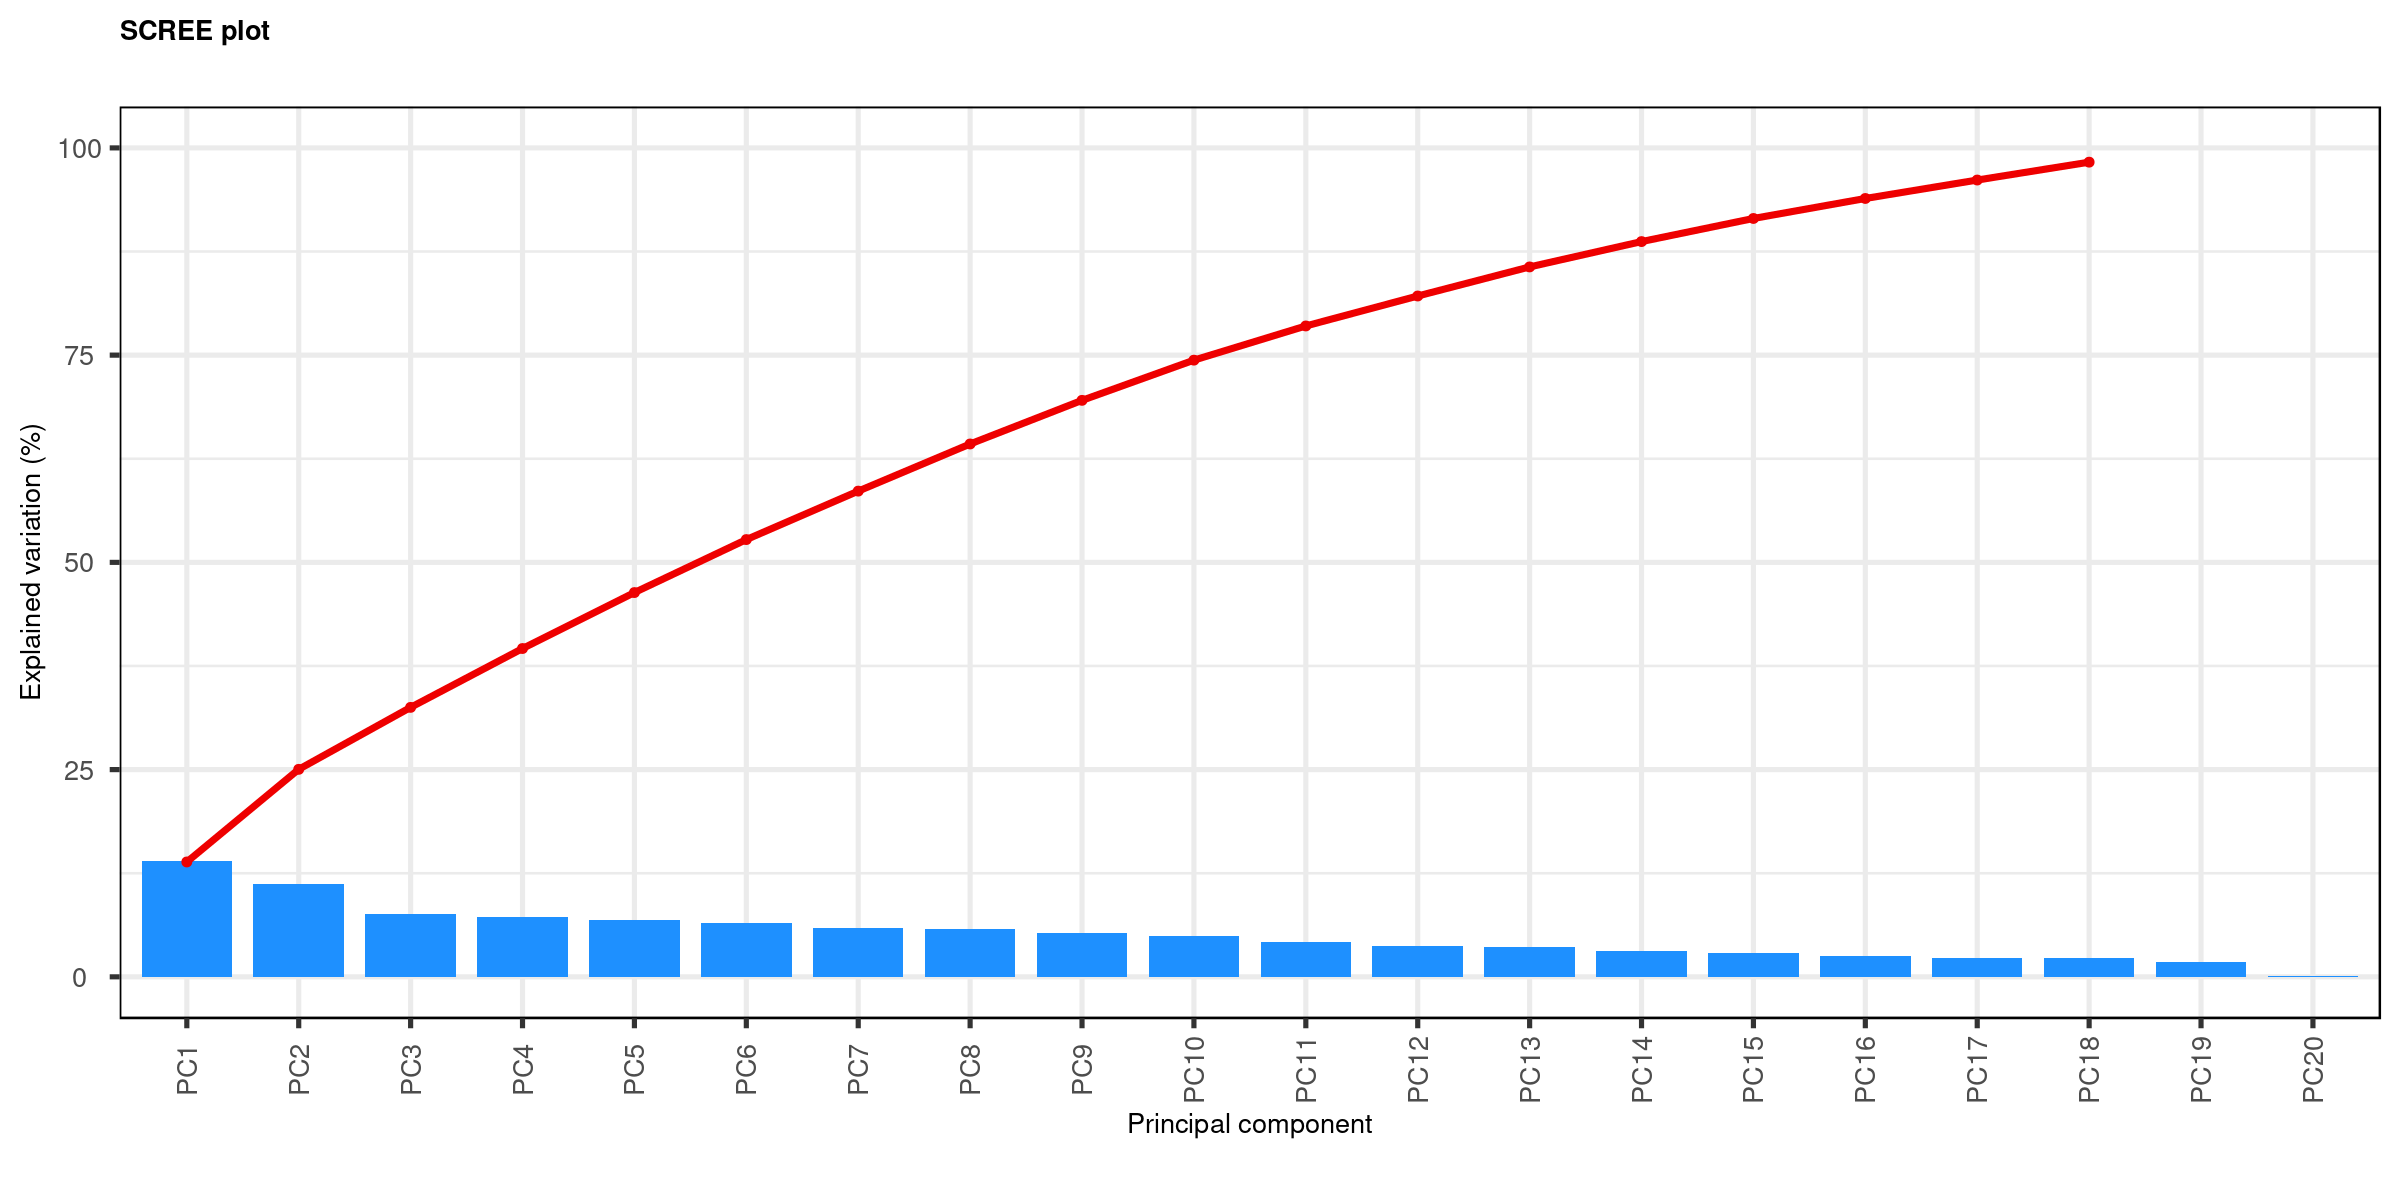

In [69]:
for(i in 1:length(e.list)){
    fig <- screeplot(pca.list[[i]],
                     components = getComponents(pca.list[[i]], c(1:20)),
                 # title=pca_title[i]
                    )
    print(fig)
}

# OUTLIER

In [70]:
## PCA figure Outlier

In [71]:
pca1_tmp<-pca.list[[1]]$rotated[c(1,2)]

In [72]:
pcaplot_outlier <-rownames(pca1_tmp)[pca1_tmp$PC1<(-50)|pca1_tmp$PC1>50]

In [73]:
pcaplot_outlier

[1] "PR79_1_WTA...040...vessel" "PR79_1_WTA...041...vessel"
[3] "PR79_1_WTA...048...vessel" "PR79_1_WTA...049...vessel"

## Outlier removal

In [74]:
Y4="output_p3"
Z4="output_e3"

if (grid_set == "N") {
    output_p4 = get(Y4)
    output_e4 = get(Z4)
    } else {
    if (grepl("pcaplot", outlier_set)==TRUE) {
        X4=outlier_set
        } else {
        grid_set = get(outlier_set)
        sp_gridflag <-names(grid_set$flag[grid_set$flag==FALSE])
        X4="sp_gridflag"
        }
    remove_sample(X4,Y4,Z4)
    output_p4 = get(paste(Y4, "_rm_", X4, sep=""))
    output_e4 = get(paste(Z4, "_rm_", X4, sep=""))
    }

[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p3_rm_pcaplot_outlier"
[1] "and the sample count in phenotype data is 16"
[1] "the file name of the expression data is output_e3_rm_pcaplot_outlier"
[1] "and the sample count in expression data is 16"


# FINAL DATA INPUT

In [75]:
d0 <- DGEList(output_e4)
m <- output_p4
e <- output_e4
f <- fdata_nodup
d0$genes <- f

### Add features of samples in "samples"

In [76]:
d0$samples$celltype <- m$celltype

PID <- as.factor(m$PID)
d0$samples$PID <- PID


condition <- as.factor(m[[COI]])
d0$samples$condition <- condition


# Ds <- as.factor(m$Clinical_phenotype_2nd)
# d0$samples$Ds <- Ds

# levels(condition) <- c("Non_Endstage", "End_stage")
m <- cbind(m, condition)

### Add normalization factors

In [77]:
d1 <- calcNormFactors(d0, method="upperquartile")

# Heatmaps

### Heatmaps with lcpm

In [78]:
logcounts <- cpm(d1, log=TRUE)

In [79]:
# We estimate the variance for each row in the logcounts matrix
var_genes <- apply(logcounts, 1, var)

select_var <- names(sort(var_genes, decreasing=TRUE))[1:500]

# Subset logcounts matrix
highly_variable_lcpm <- logcounts[select_var,]


In [80]:
heatmap_complex <- function(arg_path){
#     # find gene ids
#     genesinpath = unname(unlist(pathways.h[arg_path]))[order(unname(unlist(pathways.h[arg_path])))]

#     # convert gene ids to symbols
#     symbolsinpath = unname(unlist(d1$genes[d1$genes$ENTREZID %in% genesinpath,][1]))

#     # subset logounts matrix
#     pw_variable_lcpm = logcounts[symbolsinpath,]
    
        # scale by row
    highly_variable_lcpm_scaled = t(scale(t(highly_variable_lcpm)))
   
    
    # Plot the heatmap
    ## Annotation
    ha = HeatmapAnnotation(
    Disease = condition,
    # Disease = m$Clinical_phenotype_LV,
    # Institute = m$Institute,
    #     Degeneration = m$P_Deg_012,
    #     Hypertrophy = m$P_Hyp_012,
    #     Fibrosis = m$P_Fib_012,
    col = list(
        #ClinicalNHist_Control = c("Control_Clin" = "coral1", "Control_His" = "darkolivegreen3", "Diseased" = "purple")
               Disease = c("Control" = "white", "DCMP" = "green", "ICMP" = "orange", "ES_HCMP" = "blue", "NES_HCMP" = "coral4")
               # ,Degeneration = c("0" = "azure1", "1" = "azure2", "2" = "azure3")
               # ,Hypertrophy = c("0" = "cadetblue1", "1" = "cadetblue3", "2" = "cadetblue4")
               # ,Fibrosis = c("0" = "darkolivegreen1", "1" = "darkolivegreen2", "2" = "darkolivegreen4")
               # ,Institute = c("Asan" = "red", "Proteo" = "blue", "Sejong" = "yellow")
               )
    )
    Heatmap(highly_variable_lcpm_scaled, name="lcpm", top_annotation = ha
            ,column_dend_height = unit(3, "cm")
            ,clustering_distance_columns = "spearman"           
            # ,cluster_columns = agnes(t(highly_variable_lcpm_scaled))
           )
    
    }



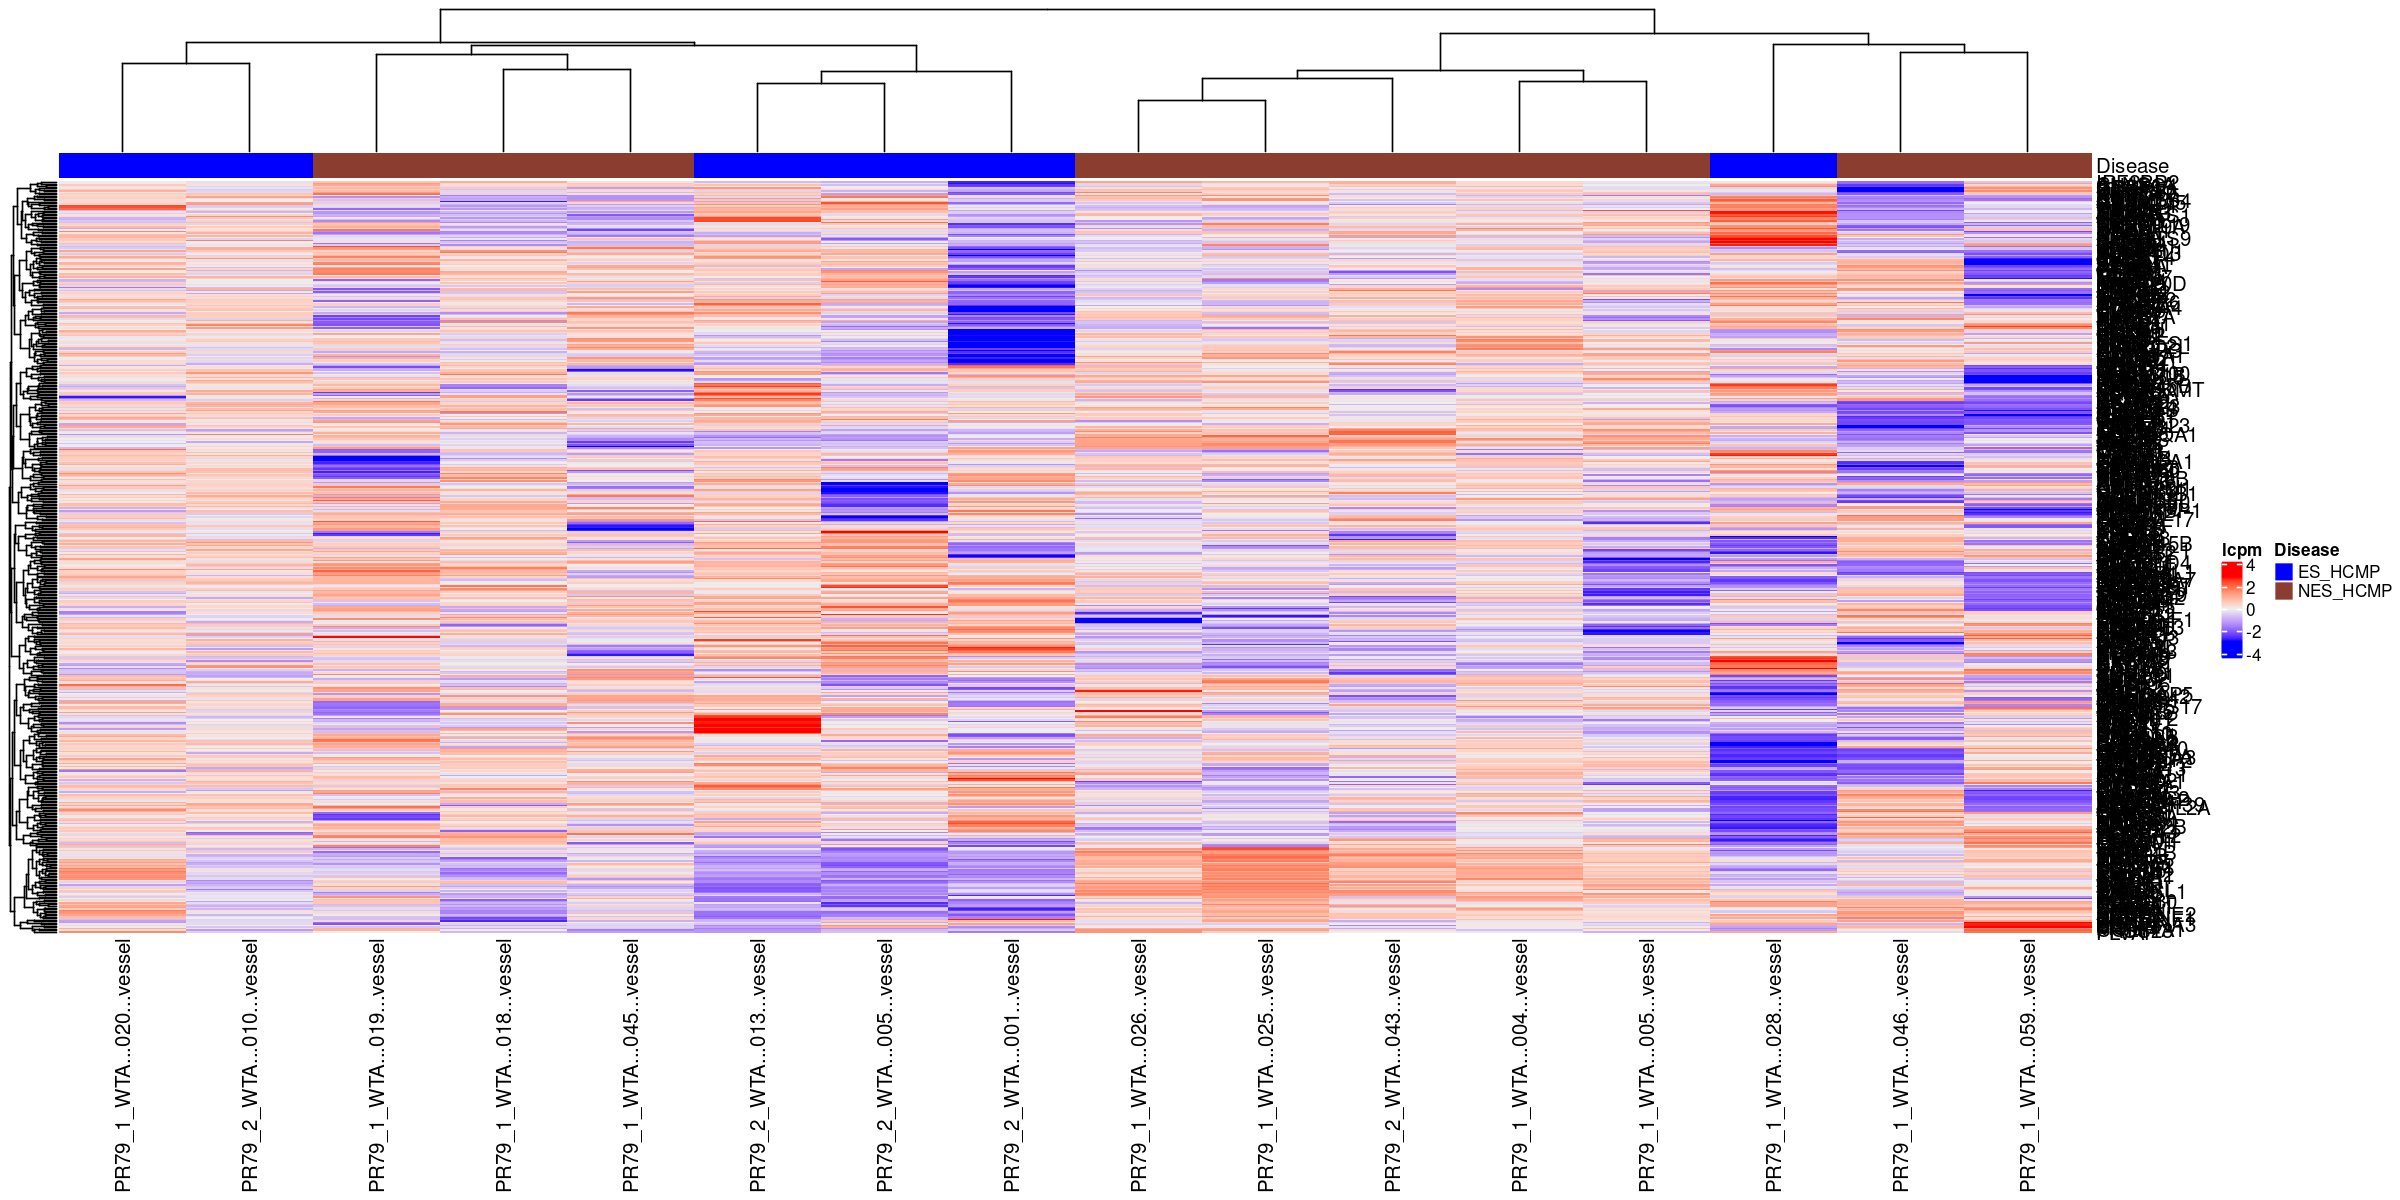

In [81]:
heatmap_complex()

In [82]:
heatmap_complex <- function(arg_path){
#     # find gene ids
#     genesinpath = unname(unlist(pathways.h[arg_path]))[order(unname(unlist(pathways.h[arg_path])))]

#     # convert gene ids to symbols
#     symbolsinpath = unname(unlist(d1$genes[d1$genes$ENTREZID %in% genesinpath,][1]))

#     # subset logounts matrix
#     pw_variable_lcpm = logcounts[symbolsinpath,]
    
        # scale by row
    highly_variable_lcpm_scaled = t(scale(t(highly_variable_lcpm)))
   
    
    # Plot the heatmap
    ## Annotation
    ha = HeatmapAnnotation(
    Disease = condition,
    # Disease = m$Clinical_phenotype_LV,
    # Institute = m$Institute,
    #     Degeneration = m$P_Deg_012,
    #     Hypertrophy = m$P_Hyp_012,
    #     Fibrosis = m$P_Fib_012,
    col = list(
        #ClinicalNHist_Control = c("Control_Clin" = "coral1", "Control_His" = "darkolivegreen3", "Diseased" = "purple")
               Disease = c("Control" = "white", "DCMP" = "green", "ICMP" = "orange", "ES_HCMP" = "blue", "NES_HCMP" = "coral4")
               # ,Degeneration = c("0" = "azure1", "1" = "azure2", "2" = "azure3")
               # ,Hypertrophy = c("0" = "cadetblue1", "1" = "cadetblue3", "2" = "cadetblue4")
               # ,Fibrosis = c("0" = "darkolivegreen1", "1" = "darkolivegreen2", "2" = "darkolivegreen4")
               # ,Institute = c("Asan" = "red", "Proteo" = "blue", "Sejong" = "yellow")
               )
    )
    Heatmap(highly_variable_lcpm_scaled, name="lcpm", top_annotation = ha
            ,column_dend_height = unit(3, "cm")
            # ,clustering_distance_columns = robust_dist           
            # ,cluster_columns = agnes(t(highly_variable_lcpm_scaled))
           )
    
    }

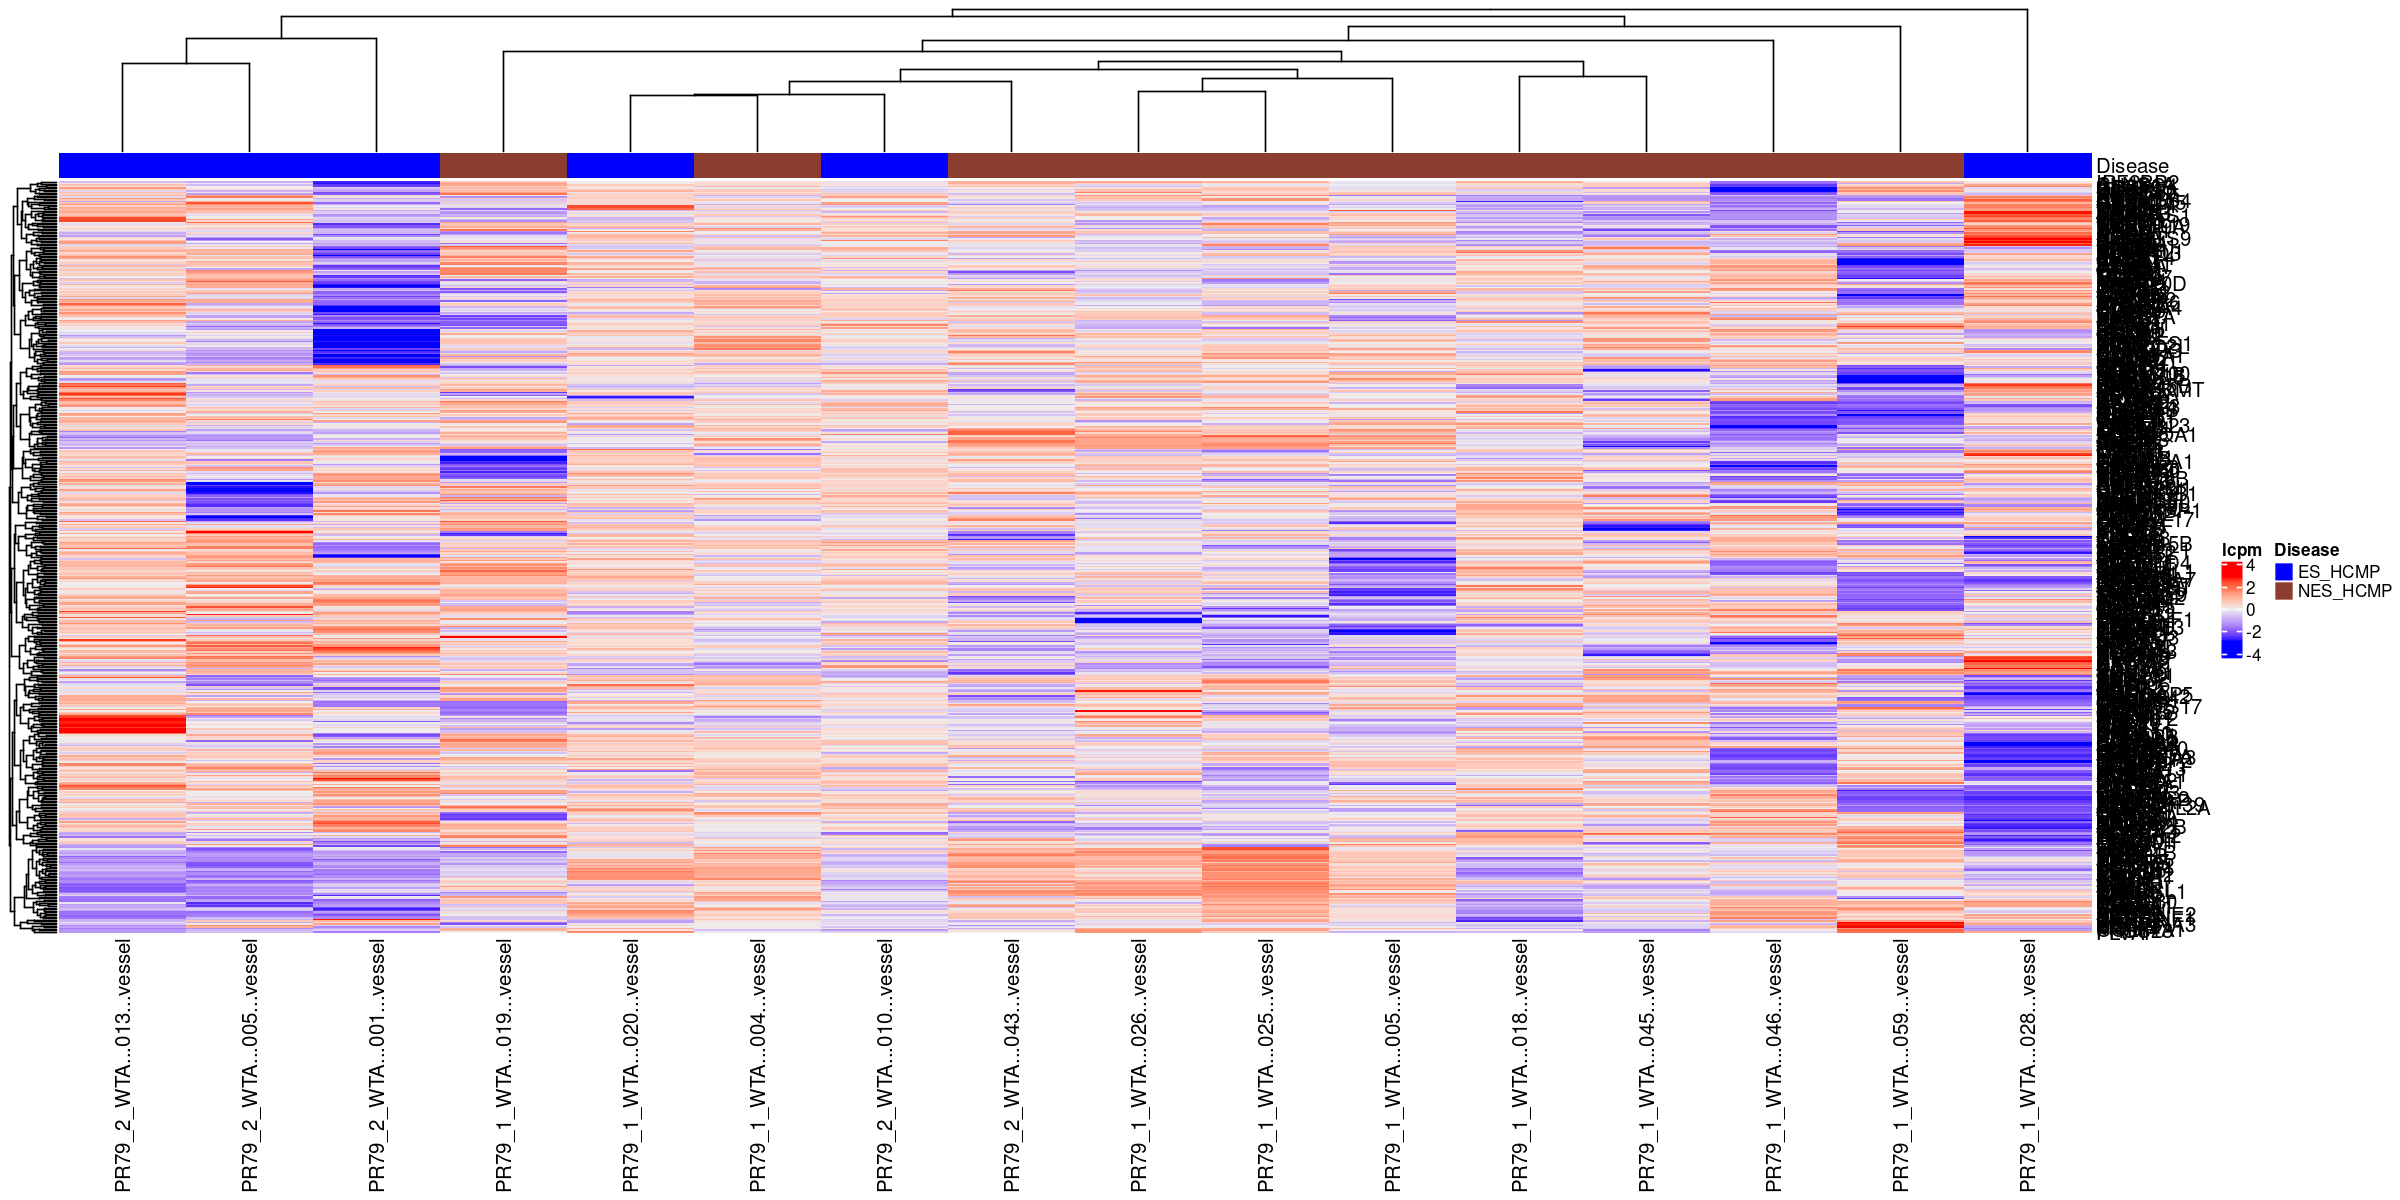

In [83]:
heatmap_complex()

In [84]:
if ("rrcov" %in% tolower((.packages())) == TRUE) {
    detach("package:rrcov", unload=TRUE)
    }


In [85]:
nonlogcounts <- cpm(d1, log=FALSE)

In [86]:
e.list_final <- list(nonlogcounts)

In [87]:

pca.list_final <- lapply(e.list_final, function(x) pca(x, metadata=m, removeVar = 0.1, scale = TRUE))

-- removing the lower 10% of variables based on variance



In [88]:
options(repr.plot.width=10, repr.plot.height=10)

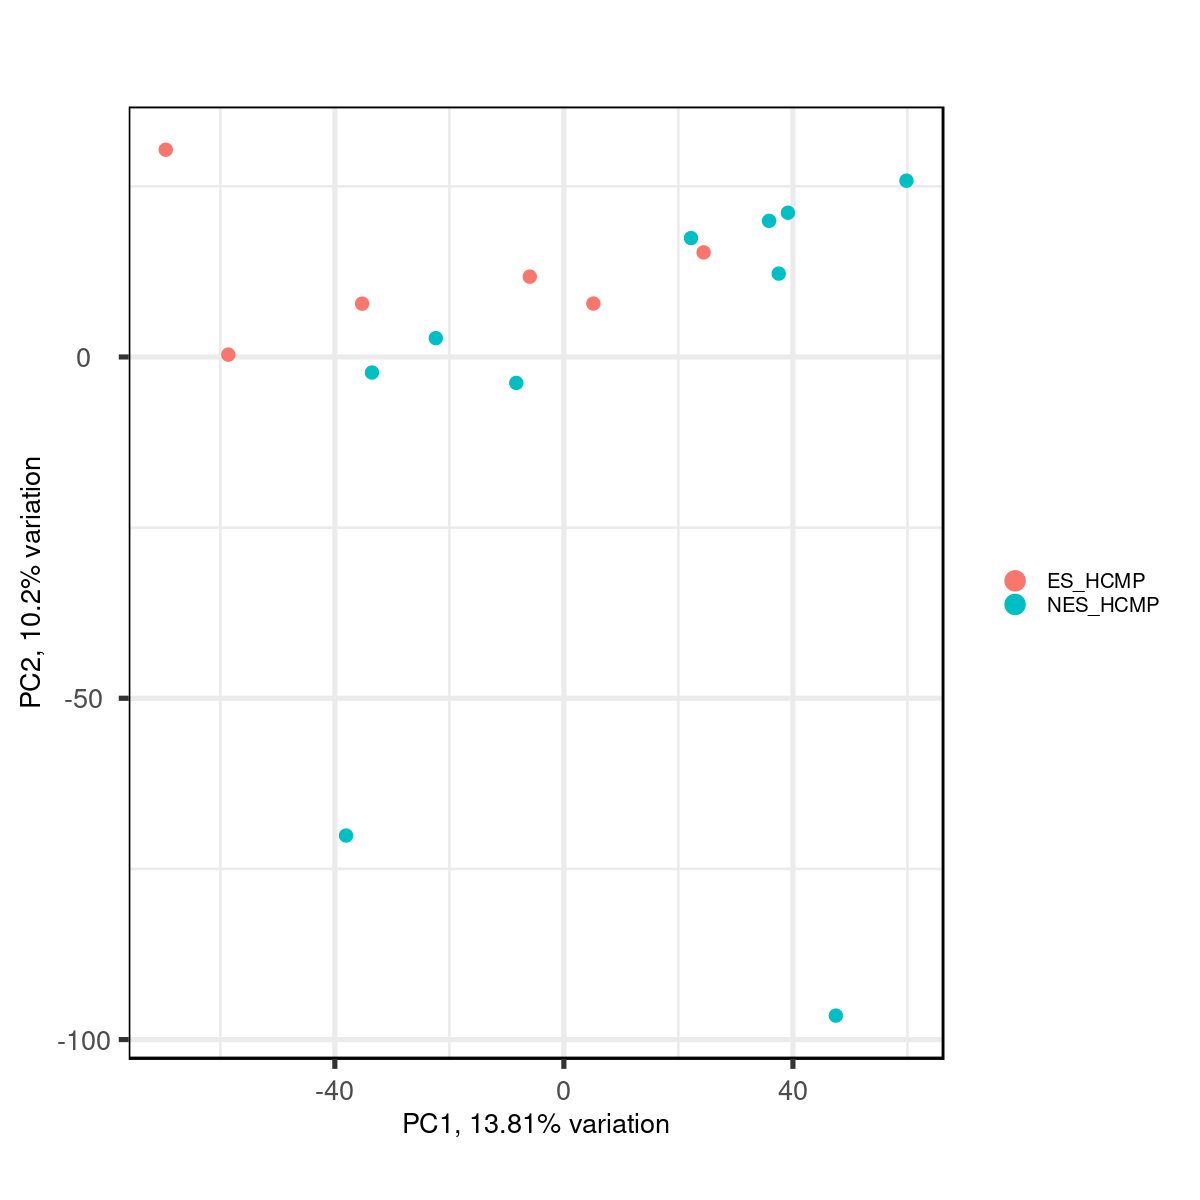

In [89]:
## PCA for cell types

par(mfrow=c(2,2))
for(i in 1:length(e.list_final)){
    fig <- biplot(pca.list_final[[i]], lab="", 
           colby =COI,
           legendPosition = "right",
                  #,shape="TMA.block"
                 )
    print(fig)
    
}

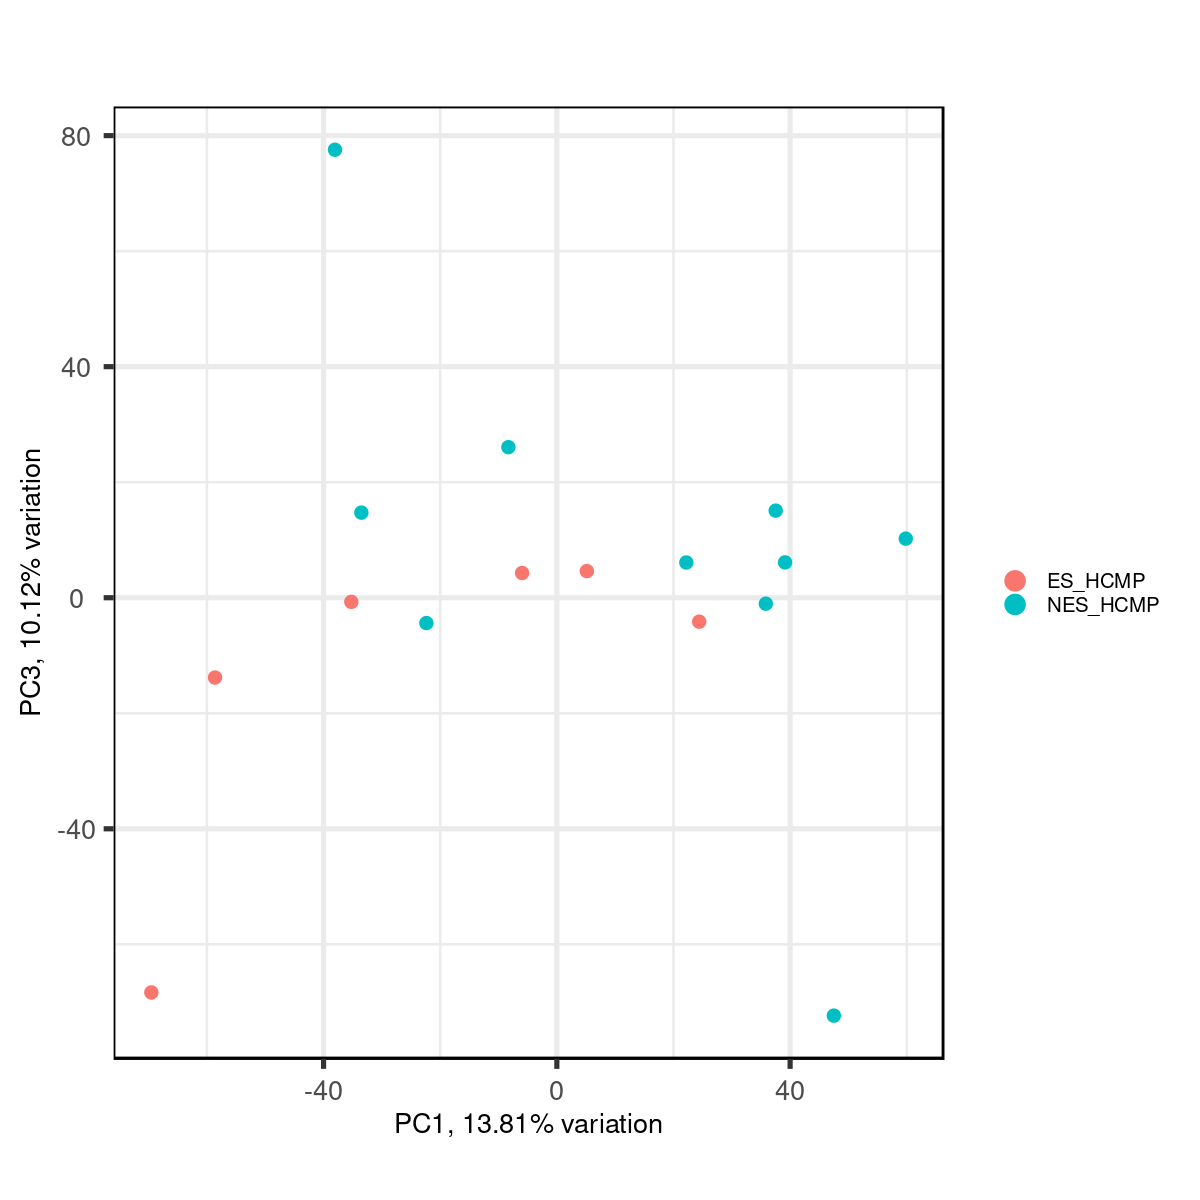

In [90]:
## PCA for cell types

par(mfrow=c(2,2))
for(i in 1:length(e.list_final)){
    fig <- biplot(pca.list_final[[i]], lab="", 
                  x = "PC1", y = "PC3",
           colby =COI,
           legendPosition = "right",
                  #,shape="TMA.block"
                 )
    print(fig)
    
}

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Coordinate system already present. Adding new coordinate system, which will
replac

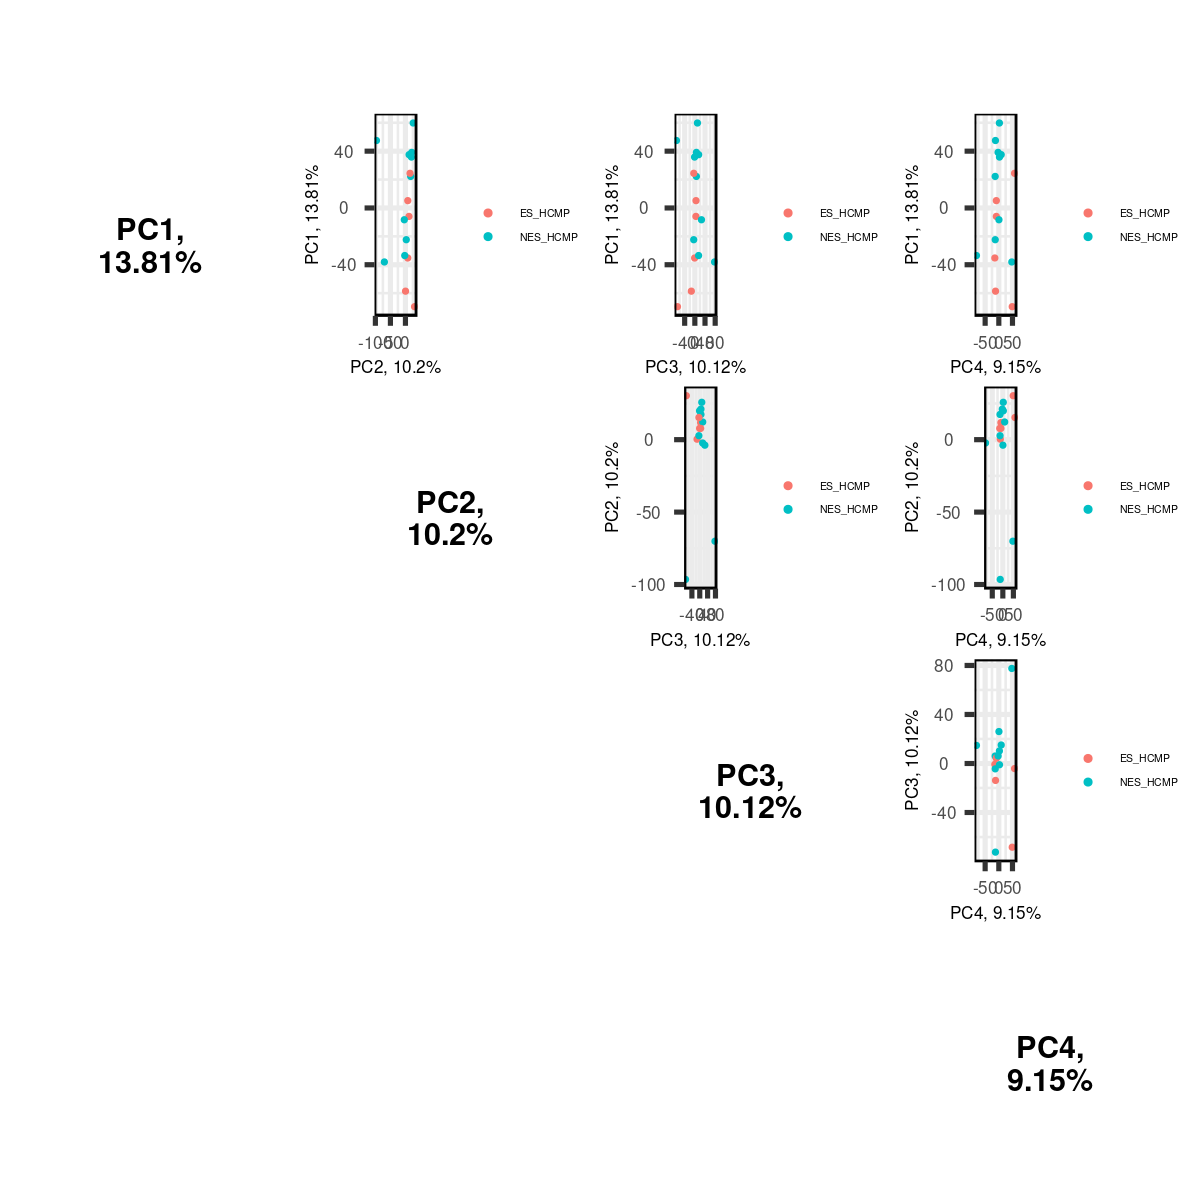

In [91]:
## PCA for cell types

par(mfrow=c(2,2))
for(i in 1:length(e.list_final)){
    fig <- pairsplot(pca.list_final[[i]] 
           , components = getComponents(pca.list_final[[i]] , seq_len(4))
           , lab="", 
           colby =COI,
           legendPosition = "right",
                  #,shape="TMA.block"
                 )
    print(fig)
    
}

# Gene expression analysis - DREAM

## Top ranked gene expression

In [92]:
param = SnowParam(NoCore, "SOCK", progressbar=TRUE)

In [93]:
#### apply to our data 4#### met_Trp_hcmp_ctrl$Clinical_phenotype_2nd
# The variable to be tested must be a fixed effect
# estimate weights using linear mixed model of dream
vobjDream = voomWithDreamWeights(d1, form, m, BPPARAM=param )

Memory usage to store result: >26.4 Mb

Dividing work into 104 chunks...

iteration: 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104



Total:81 s



In [94]:
options(repr.plot.width=4, repr.plot.height=5)


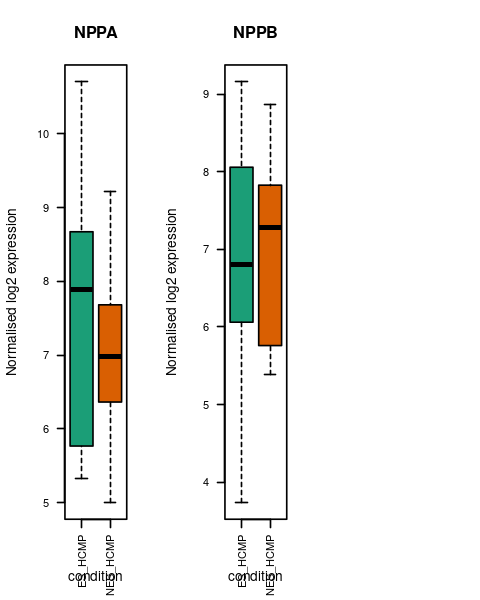

In [95]:
nice.col <- brewer.pal(6,name="Dark2")

par(mfrow=c(1,3))
boxplot(vobjDream$E["NPPA",]~condition,vertical=TRUE,las=2,cex.axis=0.8,pch=16,cex=1.3,col=nice.col,method="jitter",ylab="Normalised log2 expression",main="NPPA") 
boxplot(vobjDream$E["NPPB",]~condition,vertical=TRUE,las=2,cex.axis=0.8,pch=16,cex=1.3,col=nice.col,method="jitter",ylab="Normalised log2 expression",main="NPPB")
# boxplot(vobjDream$E["PECAM1",]~celltype,vertical=TRUE,las=2,cex.axis=0.8,pch=16,cex=1.3,col=nice.col,method="jitter",ylab="Normalised log2 expression",main="PECAM1") 



## Differential expression analysis

## Make Contrast Matrix using condition 

In [96]:
makecontrastasroutine

[1] "Y"

In [130]:
if (makecontrastasroutine == "Y") {
    if (length(levels(condition)) == 2) {
    contrast = c(paste0("condition", levels(condition)[1], " - ", "condition", levels(condition)[2]))
    } else if (length(levels(condition)) == 3) {
    contrast = c(paste0("condition", levels(condition)[2], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[1]))
    } else if (length(levels(condition)) == 4) {
    contrast = c(paste0("condition", levels(condition)[2], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[4], " - ", "condition", levels(condition)[1]))
    } else if (length(levels(condition)) == 5) {
    contrast = c(paste0("condition", levels(condition)[2], " - ", "condition", levels(condition)[1]),
                 paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[1]),
                 paste0("condition", levels(condition)[4], " - ", "condition", levels(condition)[1]),
                 paste0("condition", levels(condition)[5], " - ", "condition", levels(condition)[1]))
        }
    } else if (makecontrastasroutine == "Forclinicaldisease") {
    contrast = c(paste0("condition", levels(condition)[2], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[4], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[5], " - ", "condition", levels(condition)[1]),
              paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[5]))
    } else if (makecontrastasroutine == "celltype_comwith_othercells") {
    contrast = c("conditionCMC-(conditionEC + conditionFB)/2"
                  , "conditionEC-(conditionCMC + conditionFB)/2"
                  , "conditionFB-(conditionEC + conditionCMC)/2"
                 , "conditionFB-conditionEC"
                 , "conditionEC-conditionCMC"
                 , "conditionFB-conditionCMC"
                 , "conditionCMC-conditionNo_Seg"
                 , "conditionEC-conditionNo_Seg"
                 , "conditionFB-conditionNo_Seg")
    } else if (makecontrastasroutine == "histology012") {
    contrast = c(paste0("condition", levels(condition)[2], " - ", "condition", levels(condition)[1]),
                paste0("condition", levels(condition)[3], " - ", "condition", levels(condition)[1]),
                paste0("condition", levels(condition)[3], "- ", "condition", levels(condition)[2]))
    } else {print("Decide Contrast for differential analysis")}


In [131]:
contrast

[1] "conditionES_HCMP - conditionNES_HCMP"

In [132]:
L = makeContrastsDream(form_cont, m, 
                       contrasts = contrast)


### Fitting linear mixed model

In [133]:
## Small-sample method
if (KRanaly == "Y"){
    fit = dream(vobjDream, form_cont, m, L, ddf="Kenward-Roger", BPPARAM=param)
    } else {
    fit = dream(vobjDream, form_cont, m, L, BPPARAM=param)
    }

fit = eBayes(fit)

Dividing work into 104 chunks...

iteration: 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104



Total:574 s



In [134]:
save.image(file = file.path(getwd(), paste("Spatialanalysis", Analysis_name, "analysis.RData", sep="_")))



In [135]:
print(paste("Spatialanalysis", Analysis_name, "analysis.RData", sep="_"))

[1] "Spatialanalysis_SejongIn_Clinical_phenotype_LV_FullROI_N_cellselection_Y_Endothelial_cells_ROI_large_Vent_LV_DsSelect_ES_HCMP__NES_HCMP_Y_OL_pcaplot_outlier_RE_PID_Fixation.interval_KR_Y2023-06-23_analysis.RData"


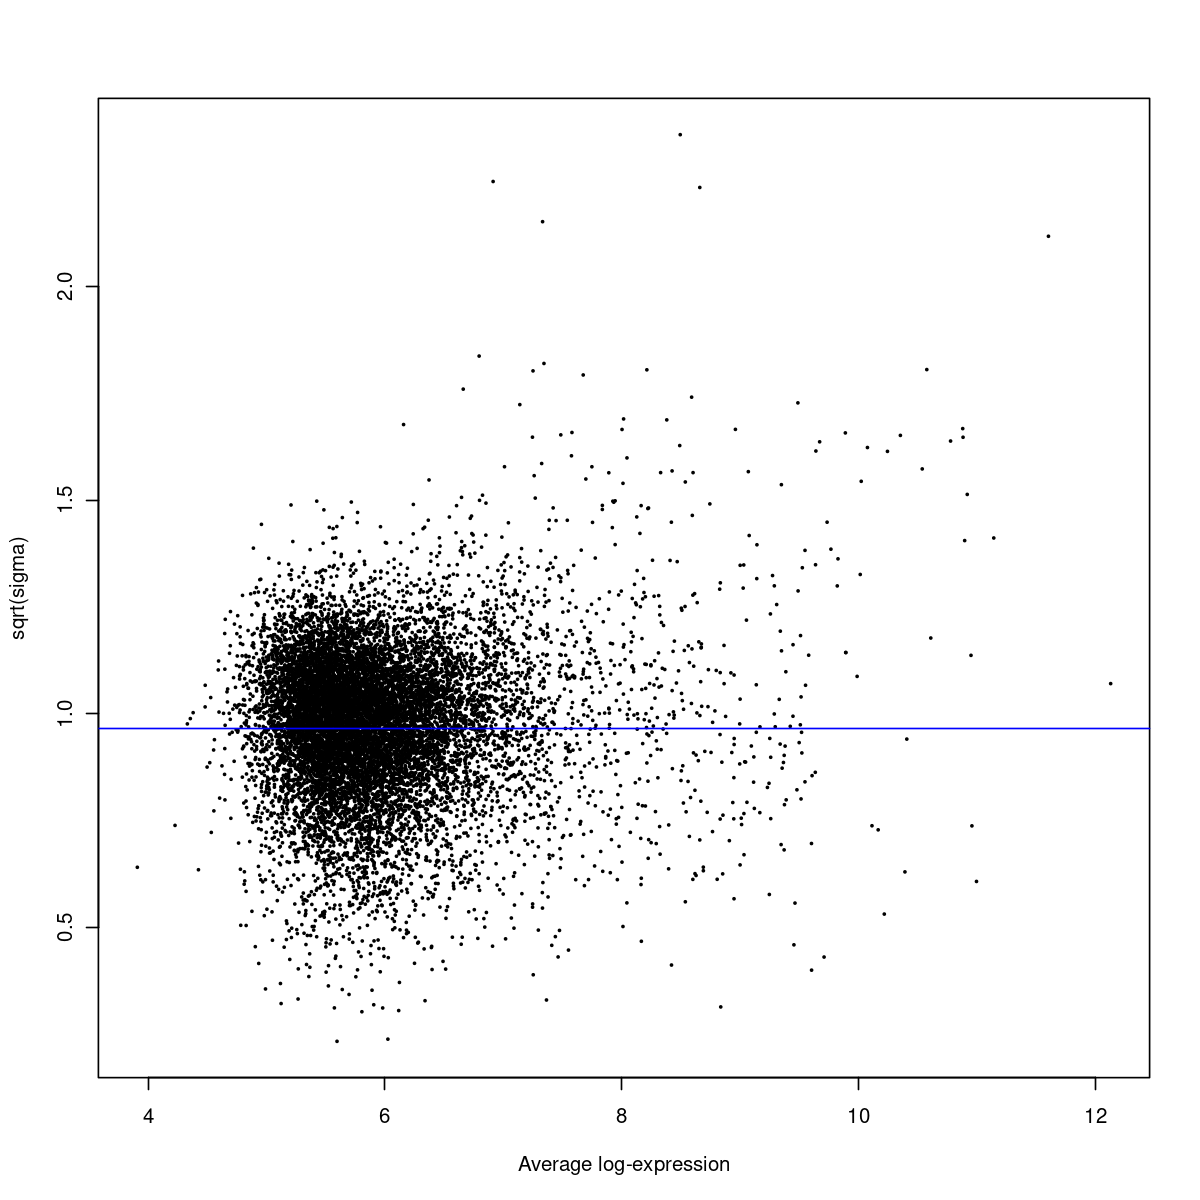

In [136]:
plotSA(fit)

### Examining  DE genes

In [137]:
summ.fit <- decideTests(fit)

In [138]:
summary(summ.fit)

       conditionES_HCMP - conditionNES_HCMP conditionES_HCMP conditionNES_HCMP
Down                                     18                0                 0
NotSig                                12770                8                 9
Up                                       12            12792             12791

# Gene set analysis 

In [168]:
# prepare pathway input
gmt.file.h <- "h.all.v7.5.1.entrez.gmt"
gmt.path.h <- file.path(getwd(), "gmt", gmt.file.h)
pathways.h <- gmtPathways(gmt.path.h)

gmt.file.c2 <- "c2.all.v7.5.1.entrez.gmt"
gmt.path.c2 <- file.path(getwd(), "gmt", gmt.file.c2)
pathways.c2 <- gmtPathways(gmt.path.c2)

str(head(pathways.h))

pathways <- list("pathways.h"=pathways.h,"pathways.c2"=pathways.c2)

List of 6
 $ HALLMARK_TNFA_SIGNALING_VIA_NFKB   : chr [1:200] "3726" "2920" "467" "4792" ...
 $ HALLMARK_HYPOXIA                   : chr [1:200] "5230" "5163" "2632" "5211" ...
 $ HALLMARK_CHOLESTEROL_HOMEOSTASIS   : chr [1:74] "2224" "1595" "3422" "2222" ...
 $ HALLMARK_MITOTIC_SPINDLE           : chr [1:199] "9181" "23332" "3832" "9493" ...
 $ HALLMARK_WNT_BETA_CATENIN_SIGNALING: chr [1:42] "4609" "1499" "3714" "4851" ...
 $ HALLMARK_TGF_BETA_SIGNALING        : chr [1:54] "7046" "4092" "7040" "64750" ...


## fGSEA rank analysis

In [169]:
DE_comparison_list <- colnames(L)

In [170]:
DE_comparison_list

[1] "conditionES_HCMP - conditionNES_HCMP"

In [171]:
for (i in DE_comparison_list){
# directory
result_dir = file.path(getwd(), "results")

# make toptable for all 
    name_toptable <-paste(gsub(" ", "", i), "all", sep="_")
    assign(name_toptable, topTable(fit, coef=i, sort.by="P", adjust.method="BH", number=Inf))

# calculate ranks - A score can be computed by multiplying direction (sign) of fold change and logarithm of p-value for each gene.
    name_rank <- paste("ranks", name_toptable, sep="_")
    assign(name_rank, sign(get(name_toptable)[["logFC"]]) * -log10(get(name_toptable)[["P.Value"]]))

# geneids
    name_gene <- paste("genes", name_toptable, sep="_")
    assign(name_gene, get(name_toptable)[[2]])

# create ranks file
    name_rankfile <- paste("rank_file", name_toptable, sep="_")
    assign(name_rankfile, cbind(get(name_gene), get(name_rank)))
    rank_file <- get(name_rankfile)
    colnames(rank_file) <- c("GeneID", "rank")

# Sort ranks in decreasing order
    rank_file <- rank_file[order(as.numeric(rank_file[,2]), decreasing = TRUE),]
    
print(head(rank_file))
print(tail(rank_file))

name_rank

# change name of name_rank 
name_rank_new <- gsub("-", "_" , 
     gsub("+", "", 
          gsub("/", "",
               gsub(" ", "", name_rank)
               )
          )
     )

# # Save rank file    
#     Rankfile_path <- file.path(getwd(), "results", paste("Rankfile", name_rank_new, Analysis_name, "forGSEA.rnk", sep="_"))
    
#     write.table(rank_file, Rankfile_path,
#             col.name=TRUE, sep="\t", row.names = FALSE, quote=FALSE)
}      

     GeneID   rank              
[1,] "390442" "5.20460721133558"
[2,] "3560"   "4.86836064598619"
[3,] "10894"  "4.61604524568438"
[4,] "261729" "4.43234389005377"
[5,] "80036"  "4.40844257882482"
[6,] "29089"  "4.39331752048139"
         GeneID  rank               
[12795,] "57178" "-5.09910213405517"
[12796,] "65108" "-5.37346230321374"
[12797,] "2487"  "-5.57200849378641"
[12798,] "90139" "-6.01737453130094"
[12799,] "3655"  "-7.19172770570011"
[12800,] "8425"  "-8.09474960535268"


In [172]:
names(pathways)

[1] "pathways.h"  "pathways.c2"

Warning message in fgsea(pathways[[a]], ranks, minSize = 15, maxSize = 500, nperm = 1000, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”


  |======================================================================| 100%

[1] "final_output.file=/gpfs/group/home/salee/Spatial_CMP/results/fGSEA_ranks_conditionES_HCMP-conditionNES_HCMP_all_SejongIn_Clinical_phenotype_LV_FullROI_N_cellselection_Y_Endothelial_cells_ROI_large_Vent_LV_DsSelect_ES_HCMP__NES_HCMP_Y_OL_pcaplot_outlier_RE_PID_Fixation.interval_KR_Y2023-06-23_result.csv"


Warning message in fgseaSimple(pathways = pathways[pathwaysUp], stats = stats[u2], :
“There were 1 pathways for which P-values were not calculated properly due to unbalanced gene-level statistic values”


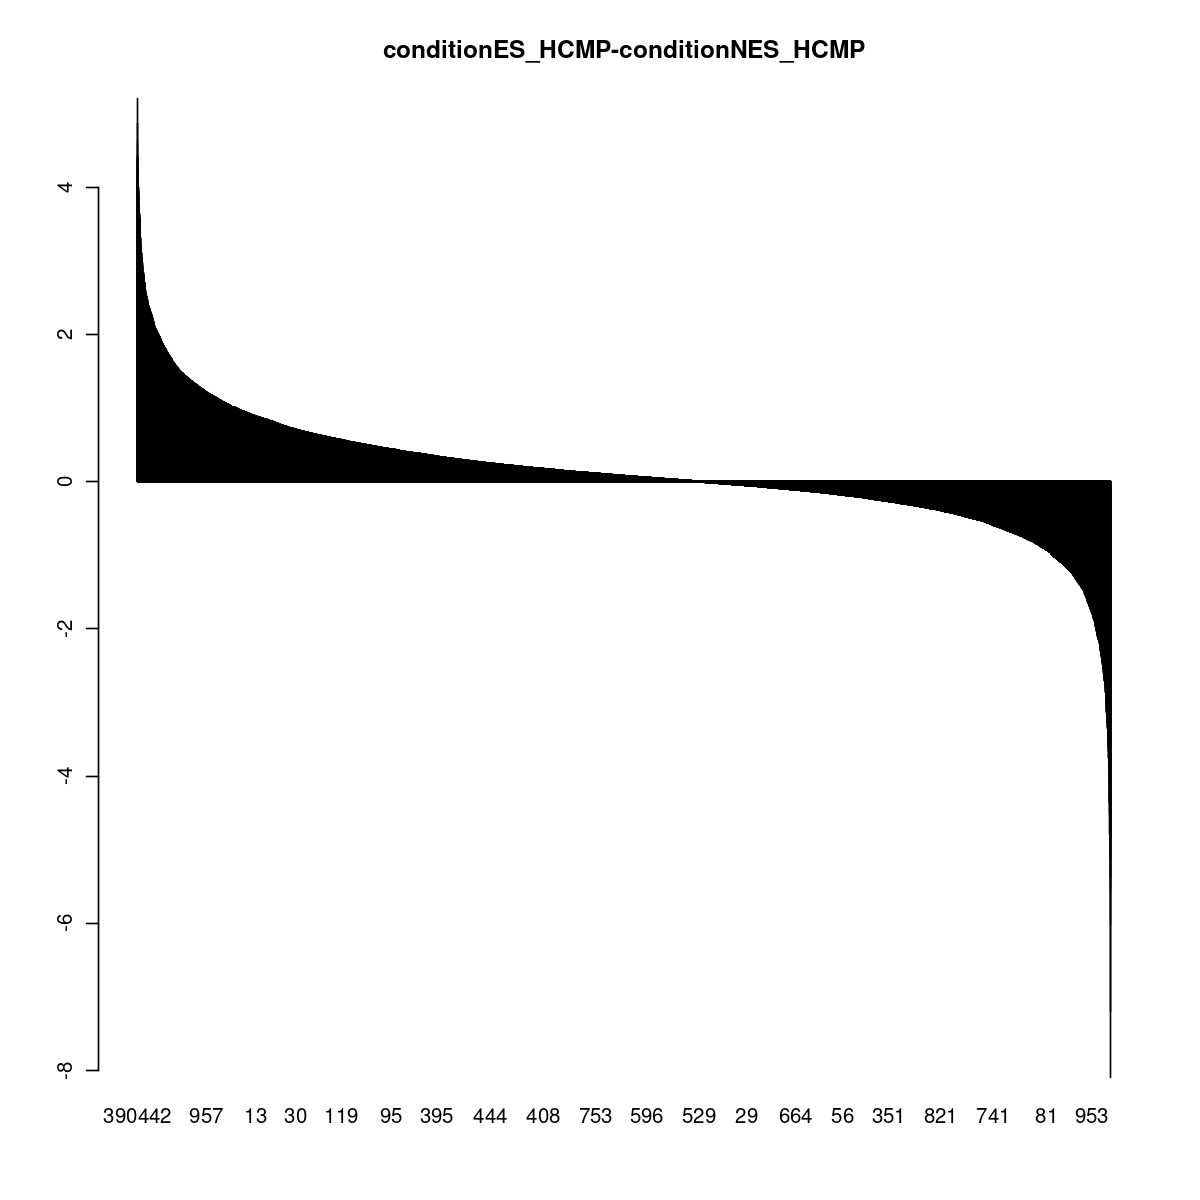

In [173]:
# only pathways.h 
# makes error with pathways.c2

pw_list <- list()
collapsed_pw_list <- list()

# loop for fgsea
# for (a in names(pathways)){
a = 'pathways.h'
for (i in DE_comparison_list){

    # assign path
        name_toptable <-paste(gsub(" ", "", i), "all", sep="_")
        name_rankfile <- paste("rank_file", name_toptable, sep="_")
        rank_file <- get(name_rankfile)
        colnames(rank_file) <- c("GeneID", "rank")
        rank_file <- as.data.frame(rank_file)
        rank_file$rank <- as.numeric(rank_file$rank)
        ranks <- setNames(rank_file$rank, rank_file$GeneID)
        barplot(sort(ranks, decreasing=T), main=gsub(" ", "", i))

    # run fgsea
    assign(paste("fgseaRes", gsub(" ", "", i), a, sep="_"), fgsea(pathways[[a]], ranks, minSize=15, maxSize=500, nperm=1000, BPPARAM=param))
    

    ## make list of fgsea result 
    tmp_df = get(paste("fgseaRes", gsub(" ", "", i), a, sep="_"))
    tmp_df2 = head(tmp_df[order(padj, -abs(NES)),1:7 ],  n=sum(tmp_df$padj<0.05))
    
    pw_list[[length(pw_list) +1]] <- datatable(tmp_df2)
       

    ## write csv file 
    write.csv(tmp_df[order(padj, -abs(NES)),1:7 ], 
              file.path(getwd(), "results", paste("fGSEA", name_rank, Analysis_name, "result.csv", sep="_")))
        print(paste0("final_output.file=", file.path(getwd(), "results", paste("fGSEA", name_rank, Analysis_name, "result.csv", sep="_"))))

    ## collapsed 
    collapsedPathways <- collapsePathways(tmp_df[order(pval)][padj < 0.05], 
                                      pathways[[a]], ranks)
    collapsed_tmp_df <- tmp_df[pathway %in% collapsedPathways$mainPathways][order(padj, -abs(NES)),1:7 ]
    collapsed_pw_list[[length(collapsed_pw_list) +1]] <- datatable(collapsed_tmp_df)
    }
    # }

# KEY RESULTS

## Figure 4A. Summary of Differentially Expressed Genes   

In [174]:
summary(summ.fit)

       conditionES_HCMP - conditionNES_HCMP conditionES_HCMP conditionNES_HCMP
Down                                     18                0                 0
NotSig                                12770                8                 9
Up                                       12            12792             12791

## Pathway analysis

In [175]:
htmltools::tagList(
  lapply(pw_list, print)
    )

Shiny tags cannot be represented in plain text (need html)

In [176]:
htmltools::tagList(
  lapply(collapsed_pw_list, print)
    )

Shiny tags cannot be represented in plain text (need html)

In [177]:
options(repr.plot.width=18, repr.plot.height=7)


## Figure 4H

In [178]:
DE_comparison_list

[1] "conditionES_HCMP - conditionNES_HCMP"

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


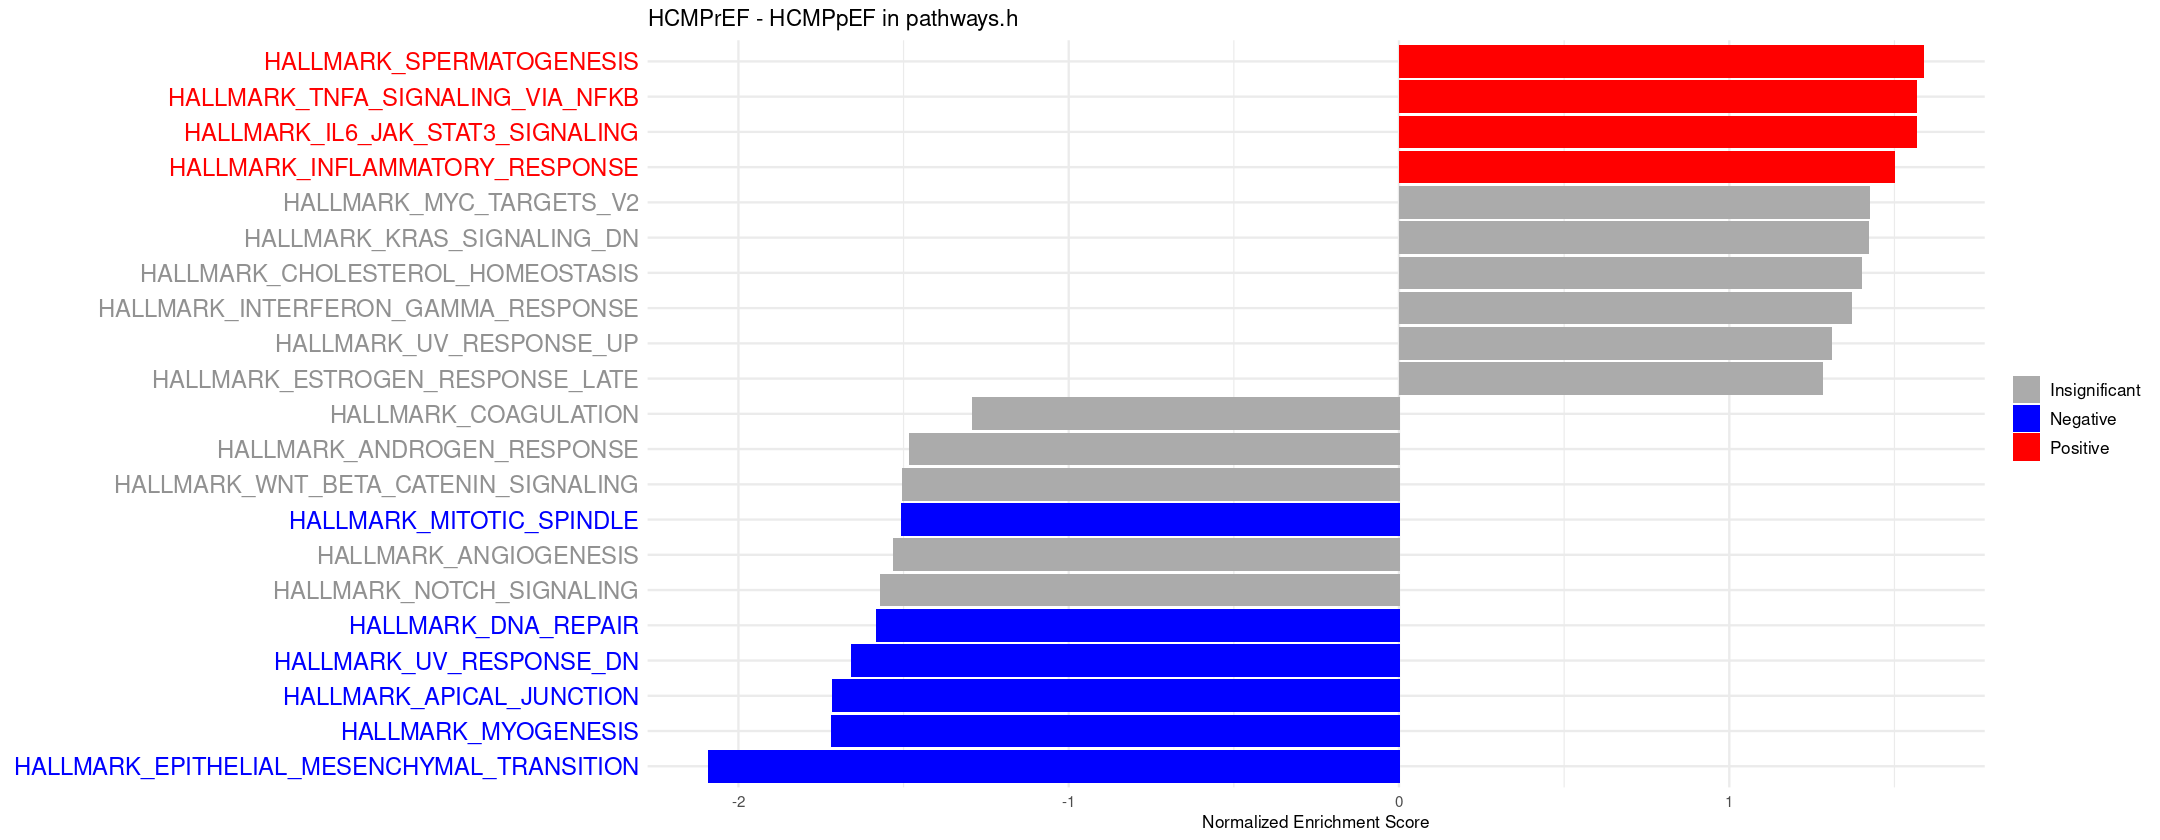

In [179]:
# for (a in names(pathways)){
a = 'pathways.h'
# i = 'conditionDCMP - conditionControl'
for (i in DE_comparison_list){
        tmp_df = get(paste("fgseaRes", gsub(" ", "", i), a, sep="_"))
        tmp_df_tidy <- tmp_df %>%
        as_tibble() %>%
        arrange(desc(NES))
        tmp_df_tidy_pval <-tmp_df_tidy[tmp_df_tidy$pval<0.05,]
        tmp_df_tidy_pval <- tmp_df_tidy_pval %>% mutate(clas=ifelse(padj<0.05 & NES>0, "Positive", ifelse(padj<0.05 & NES<0, "Negative", "Insignificant")))
        picture_pathway <- ggplot(tmp_df_tidy_pval, aes(reorder(pathway, NES), NES)) +
          geom_col(aes(fill=factor(clas))) +
          scale_fill_manual(values = c("gray67", "blue", "red")) +
          coord_flip() +
          labs(x="", y="Normalized Enrichment Score",
        title=paste(gsub("ES_HCMP", "HCMPrEF", gsub("NES_HCMP", "HCMPpEF", gsub("condition", "", i))), "in", a)) + 
        theme_minimal() +
            theme(legend.title=element_blank()) +

        theme(axis.title.x = element_text(size = 10, angle = 00)) +
        theme(axis.title.y = element_text(size = 10, angle = 00)) +
        theme(legend.text=element_text(size = 10)) +
        theme(axis.text.y = element_text(size = 14, colour=rev(ifelse(tmp_df_tidy_pval$clas=="Positive", "red", ifelse(tmp_df_tidy_pval$clas=="Negative", "blue", "gray57")))))     


  # theme_minimal()
 print(picture_pathway)
    }

In [180]:
# # for (a in names(pathways)){
# a = 'pathways.h'
# # i = 'conditionDCMP - conditionControl'
# for (i in DE_comparison_list){
#         tmp_df = get(paste("fgseaRes", gsub(" ", "", i), a, sep="_"))
#         tmp_df_tidy <- tmp_df %>%
#         as_tibble() %>%
#         arrange(desc(NES))
#         tmp_df_tidy_pval <-tmp_df_tidy[tmp_df_tidy$pval<0.05,]
#         tmp_df_tidy_pval <- tmp_df_tidy_pval %>% mutate(clas=ifelse(padj<0.05 & NES>0, "Positive", ifelse(padj<0.05 & NES<0, "Negative", "Insignificant")))
#         picture_pathway <- ggplot(tmp_df_tidy_pval, aes(reorder(pathway, NES), NES)) +
#           geom_col(aes(fill=factor(clas))) +
#           scale_fill_manual(values = c("gray67", "blue", "red")) +

#           coord_flip() +
#           labs(x="", y="Normalized Enrichment Score",
#         title=paste(gsub("NES_HCMP", "HCMPpEF", gsub("condition", "", i)), "in", a)) + 
#         theme_minimal() +
#             theme(legend.title=element_blank()) +

#         theme(axis.title.x = element_text(size = 10, angle = 00)) +
#         theme(axis.title.y = element_text(size = 10, angle = 00)) +
#         theme(legend.text=element_text(size = 10)) +
#         theme(axis.text.y = element_text(size = 14, colour=rev(ifelse(tmp_df_tidy_pval$clas=="Positive", "red", ifelse(tmp_df_tidy_pval$clas=="Negative", "blue", "gray57")))))     


#   # theme_minimal()
#  print(picture_pathway)
#         # dplyr::select(-leadingEdge, -ES, -nMoreExtreme) %>%
#         # arrange(padj) %>%
#         # DT::datatable()
#     # print(head(tmp_df[order(padj, -abs(NES)),1:7 ],  n=sum(tmp_df$padj<0.05)))
#     # write.csv(tmp_df[order(padj, -abs(NES)),1:7 ], 
#     #           file.path(getwd(), "results", paste("fGSEA", "ranks", a, order, Y1, COI, gsub(" ", "", i), "result.csv", sep="_")))
#     #     print(paste0("final_output.file=", file.path(getwd(), "results", paste("fGSEA", "ranks", a, order, Y1, COI, gsub(" ", "", i), "result.csv", sep="_"))))
#     }
#     # }

In [181]:
saveRDS(picture_pathway, file = paste0("Figure4_pathway_", cell_type,"_",
                                       paste(disease_type_vector,collapse="vs"), ".rds"
                                      )
        )

In [182]:
print(paste0("Figure4_pathway_", cell_type,"_",
                                       paste(disease_type_vector,collapse="vs"), ".rds"
                                      )
     )

[1] "Figure4_pathway_Endothelial_cells_ES_HCMPvsNES_HCMP.rds"


In [183]:
# saveRDS(picture_pathway, file = "Figure4_pathway_CMC_NESHCMPvscontrol.rds")

## Supplemental Table 6 - Files for differentially expressed genes

In [3]:
for (i in 1:(length(colnames(summ.fit))-length(levels(condition)))){
        ## make file 
    DE_filename = paste("fSupplT6_DE_", Analysis_name 
                                , gsub("-", "_" , 
                                      gsub("+", "", 
                                           gsub("/", "", 
                                                #gsub(")", "", 
                                                     #gsub("(", "", 
                                                          gsub(" ", "", colnames(summ.fit)[i])
                                                         #)
                                                    #)
                                                )
                                           )
                                      ), sep=""
                       )
    write.csv(topTable(fit, coef=colnames(summ.fit)[i], number=Inf),                 
              file.path(getwd(), "results", 
                          paste0(DE_filename, ".csv")
                        )
             )

    saveRDS(topTable(fit, coef=colnames(summ.fit)[i], number=Inf),                 
              file.path(getwd(), "results", 
                          paste0(DE_filename, ".rds")
                       )
            )
    
    print(paste0("final_output.file=", 
                 file.path(getwd(), "results", 
                                                 DE_filename)
                )
              )
    }
 

[1] "final_output.file=/gpfs/group/home/salee/Spatial_CMP/results/fSupplT6_DE_SejongIn_Clinical_phenotype_LV_FullROI_N_cellselection_Y_Endothelial_cells_ROI_large_Vent_LV_DsSelect_ES_HCMP__NES_HCMP_Y_OL_pcaplot_outlier_RE_PID_Fixation.interval_KR_Y2023-06-23conditionES_HCMP_conditionNES_HCMP"


In [194]:
head(topTable(fit, coef=colnames(summ.fit)[i], number=Inf))

,SYMBOL,ENTREZID,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val,B,z.std
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LTBP4,LTBP4,8425,latent transforming growth factor beta binding protein 4,-0.8546075,8.085251,-5.782038,8.039895e-09,0.0001029107,3.9290194,-5.767620
ITGA6,ITGA6,3655,integrin subunit alpha 6,-0.7687945,7.588349,-5.427020,6.430908e-08,0.0004115781,2.8753974,-5.406386
TSPAN18,TSPAN18,90139,tetraspanin 18,-0.7632104,6.736991,-4.921133,9.607834e-07,0.0040993423,1.8390883,-4.899505
FRZB,FRZB,2487,frizzled related protein,-1.6338302,6.523105,-4.776261,2.679116e-06,0.0085731710,0.3543531,-4.694002
MARCKSL1,MARCKSL1,65108,MARCKS like 1,-0.8846452,7.120280,-4.623840,4.231922e-06,0.0108337214,0.7865703,-4.599654
OR11H4,OR11H4,390442,olfactory receptor family 11 subfamily H member 4,1.0314090,5.137564,4.684029,6.242992e-06,0.0133183832,0.8611913,4.517988


## Figures for differentially expressed genes

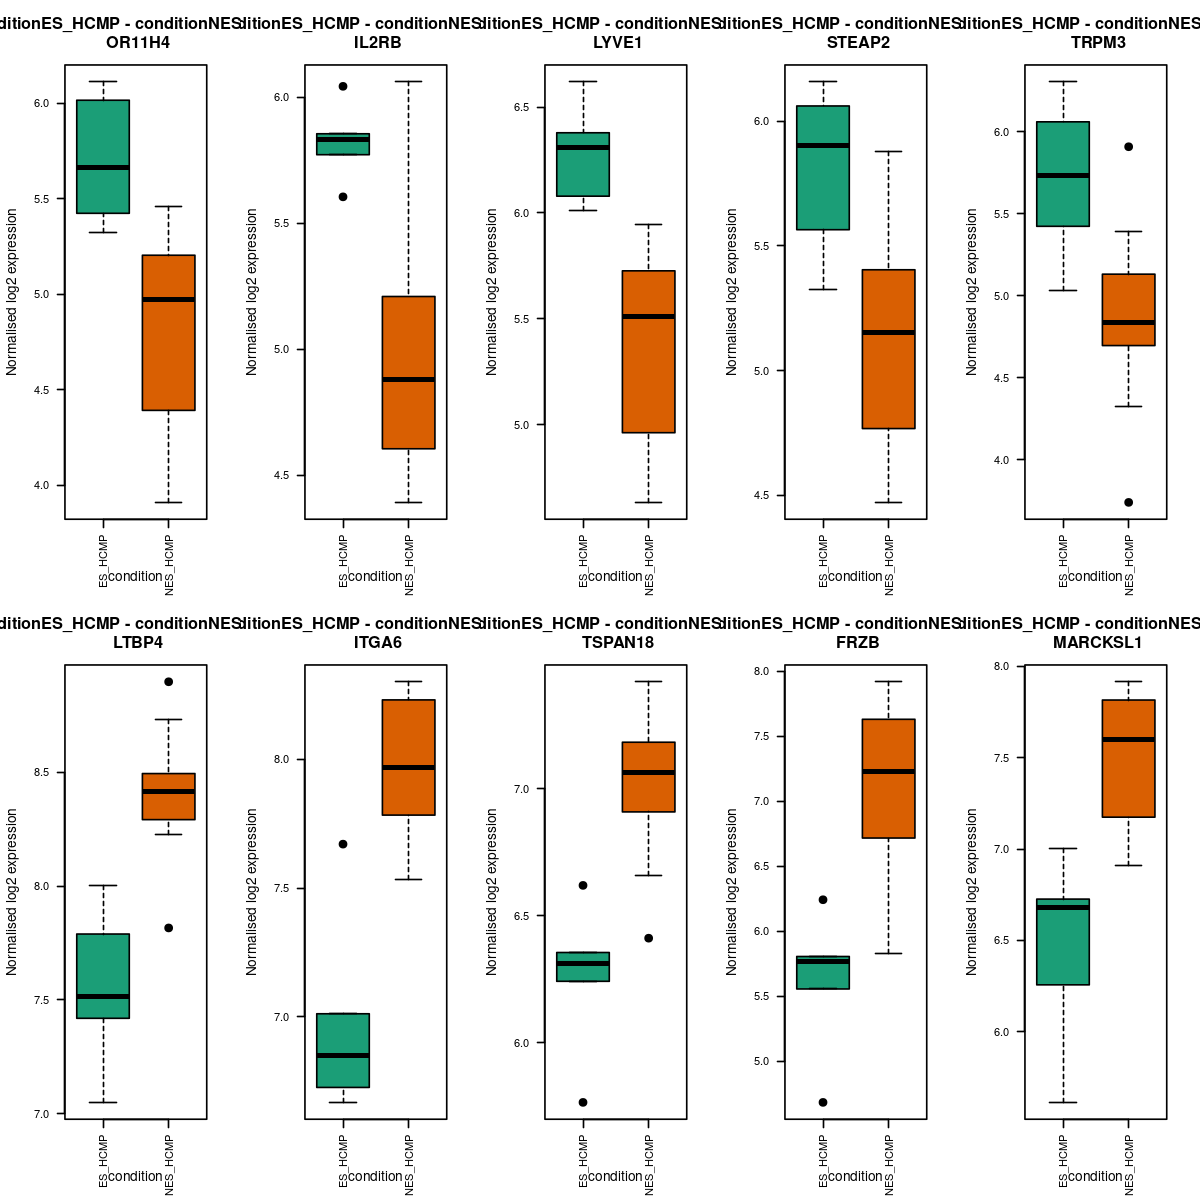

In [185]:
for (a in colnames(L)){
    table_tmp = topTable(fit, coef=a, sort.by="P", adjust.method="BH", number=Inf)
    Pos_tmp <-table_tmp[table_tmp[["logFC"]]>0,]$SYMBOL[1:5]
    Neg_tmp <-table_tmp[table_tmp[["logFC"]]<0,]$SYMBOL[1:5]

    # topTable(fit, coef=a, number=20)$SYMBOL
    options(repr.plot.width=10, repr.plot.height=10)
    par(mfrow=c(2,5))
    
    for (i in Pos_tmp){
        boxplot(vobjDream$E[i,]~condition,vertical=TRUE,las=2,cex.axis=0.8,pch=16,cex=1.3,col=nice.col,method="jitter",ylab="Normalised log2 expression",main=paste(a, "\n",i)) 
    }
    for (i in Neg_tmp){
        boxplot(vobjDream$E[i,]~condition,vertical=TRUE,las=2,cex.axis=0.8,pch=16,cex=1.3,col=nice.col,method="jitter",ylab="Normalised log2 expression",main=paste(a, "\n",i)) 
    }
}

Warning message:
“Removed 12770 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


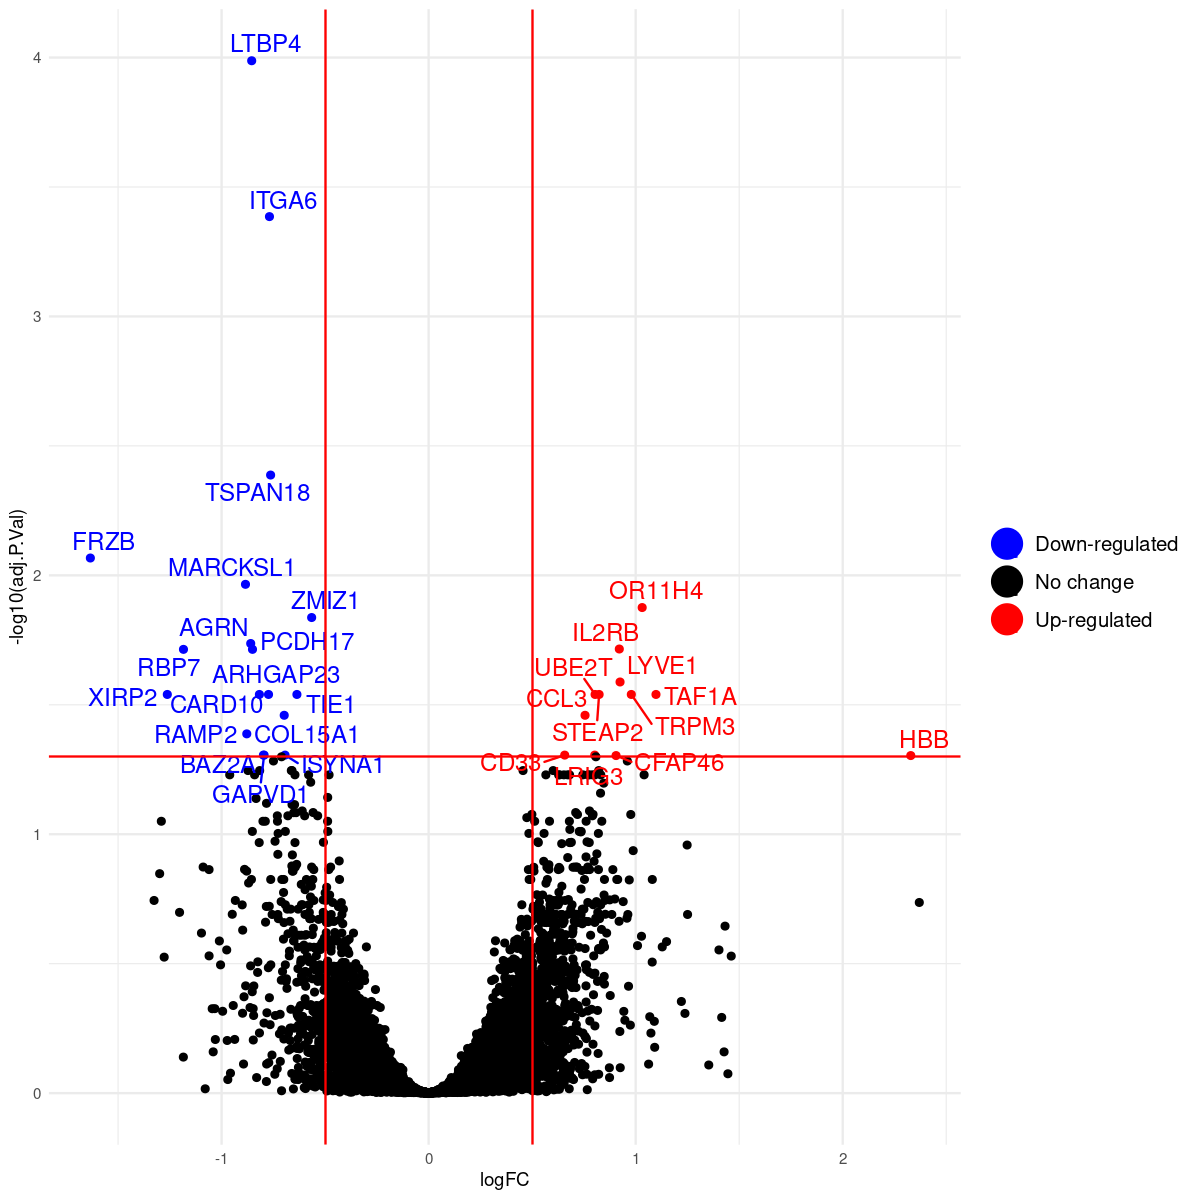

In [186]:
for (a in colnames(L)){
    table_tmp = topTable(fit, coef=a, sort.by="P", adjust.method="BH", number=Inf)
table_tmp$diffexpressed <- "NO"
table_tmp$diffexpressed[table_tmp$logFC > 0 & table_tmp$adj.P.Val < 0.05] <- "UP"
table_tmp$diffexpressed[table_tmp$logFC < 0 & table_tmp$adj.P.Val < 0.05] <- "DOWN"
table_tmp$delabel <- NA
table_tmp$delabel[table_tmp$diffexpressed != "NO"] <- table_tmp$SYMBOL[table_tmp$diffexpressed != "NO"]

    # plot adding up all layers we have seen so far
plot_tmp<-ggplot(data=table_tmp, aes(x=logFC, y=-log10(adj.P.Val), col=diffexpressed, label=delabel)) +
        geom_point() + 
        theme_minimal() +
        geom_text_repel(size=5) +
        scale_color_manual(values=c("blue", "black", "red"), labels=c('Down-regulated', 'No change', 'Up-regulated')) +
        geom_vline(xintercept=c(-0.5, 0.5), col="red") +
        geom_hline(yintercept=-log10(0.05), col="red") +
        theme(legend.title=element_blank(),
     legend.text = element_text(size=12)) +
    guides(color = guide_legend(override.aes = list(size = 8))) 
    print(plot_tmp)
    }

In [187]:
saveRDS(plot_tmp, file = paste0("Figure4_volcano_", cell_type,"_",
                                       paste(disease_type_vector,collapse="vs"), ".rds"
                                      )
        )

In [188]:
print(paste0("Figure4_volcano_", cell_type,"_",
                                       paste(disease_type_vector,collapse="vs"), ".rds"
                                      )
     )

[1] "Figure4_volcano_Endothelial_cells_ES_HCMPvsNES_HCMP.rds"


In [189]:
# saveRDS(plot_tmp, file = "Figure4_volcano_EC_HCMPpEFvsrEF.rds")

# #Save image & sessionInfo()

In [190]:
save.image(file = file.path(getwd(), paste("Spatialanalysis", Analysis_name, "analysis.RData", sep="_")))



In [191]:
print(file.path(getwd(), paste("Spatialanalysis", Analysis_name, "analysis.RData", sep="_")))

[1] "/gpfs/group/home/salee/Spatial_CMP/Spatialanalysis_SejongIn_Clinical_phenotype_LV_FullROI_N_cellselection_Y_Endothelial_cells_ROI_large_Vent_LV_DsSelect_ES_HCMP__NES_HCMP_Y_OL_pcaplot_outlier_RE_PID_Fixation.interval_KR_Y2023-06-23_analysis.RData"


In [192]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS:   /opt/applications/R/4.0.0/gnu/lib64/R/lib/libRblas.so
LAPACK: /opt/applications/R/4.0.0/gnu/lib64/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ComplexHeatmap_2.4.3      DT_0.27                  
 [3] data.table_1.14.8         fgsea_1.14.0             
 [5] RCy3_2.8.1                GSA_1.03.1               
 [7] RCurl_1.98-1.10           spatstat_3.0-3   